## 라이브러리 import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn           as sb
import scipy.stats       as sp

In [3]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(777)

스케일러 라이브러리

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import joblib

## 데이터 불러오기

In [7]:
for i in range (100):
    temp_data = pd.read_csv('./test1_result/dp%d-blow-thick.csv'%(i+1),skiprows = 4, sep=',')
    s = "thickness_dp%d = temp_data"%(i+1)
    exec(s)

In [39]:
thickness_dp1

Curve Length on Polyline 1 [ m ]  THICKNESS [ m ]
0                           0.000000         0.002760
1                           0.003012         0.002548
2                           0.006101         0.002492
3                           0.007720         0.002040
4                           0.009473         0.001648
..                               ...              ...
56                          0.283006         0.001917
57                          0.286500         0.001991
58                          0.290046         0.002033
59                          0.293606         0.002398
60                          0.297487         0.002737

[61 rows x 2 columns]

<Figure size 432x288 with 0 Axes>

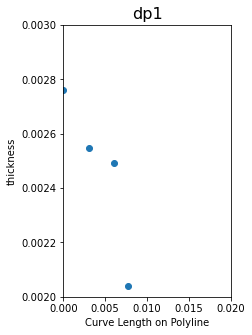

In [109]:
plt.clf()
for i in range (1):
    plt.figure(figsize = (3,5))
    s = "plt.plot(thickness_dp%d.iloc[:,0],thickness_dp%d.iloc[:,1],'o')"%(i+1,i+1)
    exec(s)
    plt.xlabel("Curve Length on Polyline")
    plt.ylabel("thickness")
    plt.xlim(0,0.02)
    plt.ylim(0.002,0.003)

    plt.title("dp%d"%(i+1),fontsize = 16)
#     plt.savefig("C:/Users/SDML/Desktop/blow thickness plot/dp%d_thickness plot.jpg"%(i+1))
#     plt.show()
#     plt.clf()


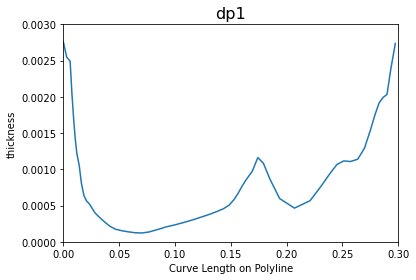

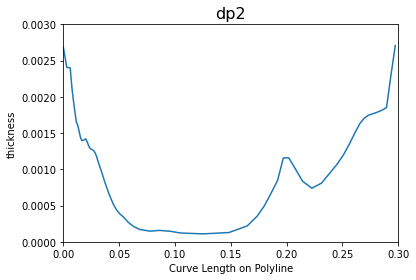

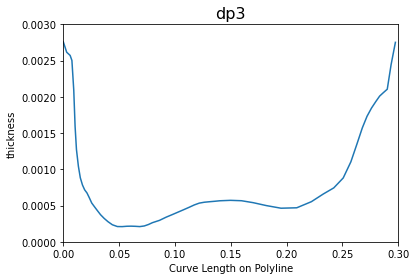

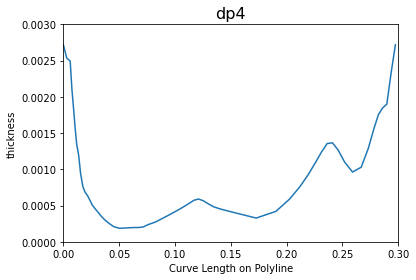

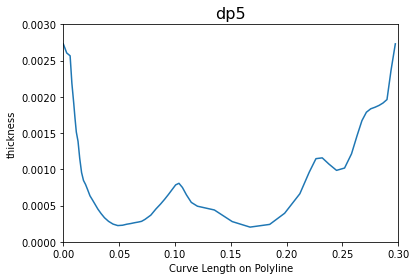

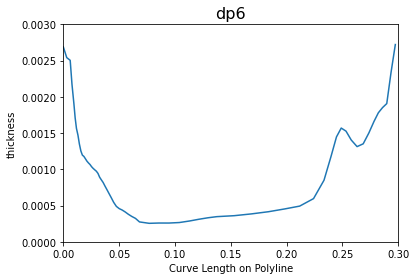

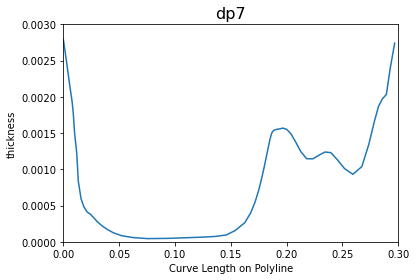

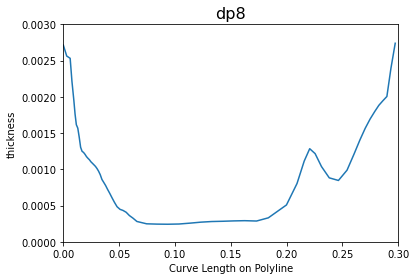

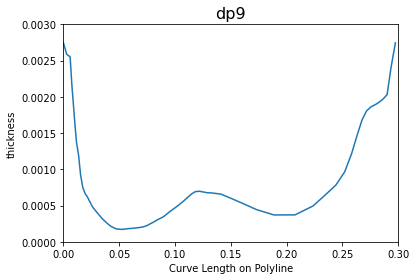

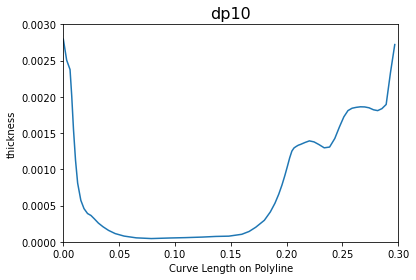

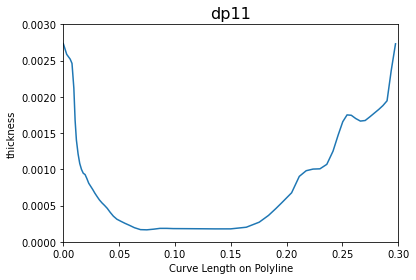

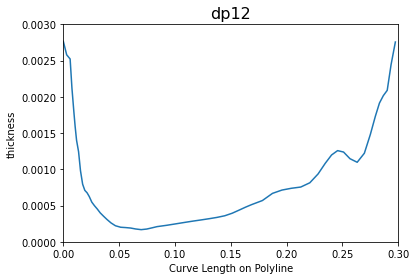

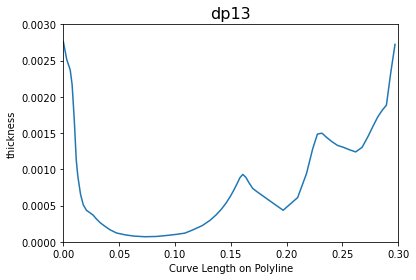

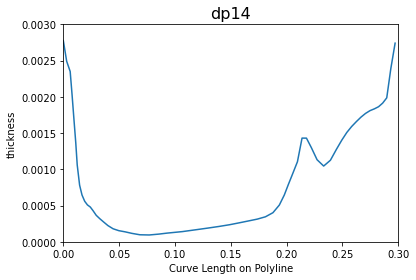

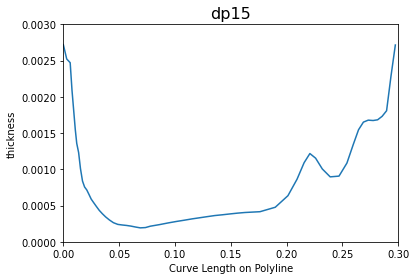

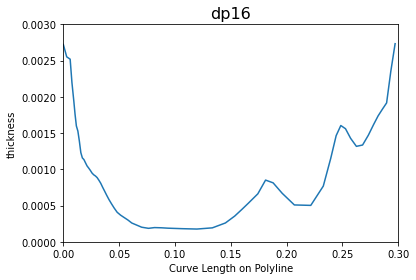

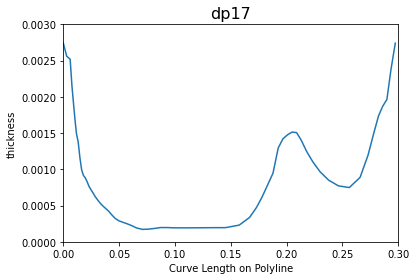

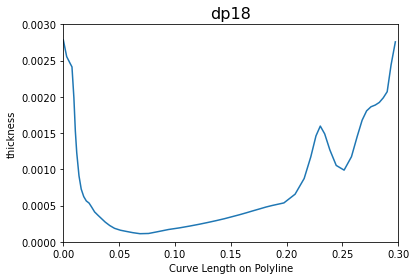

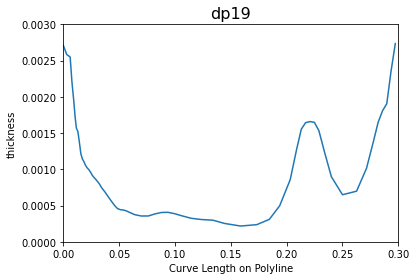

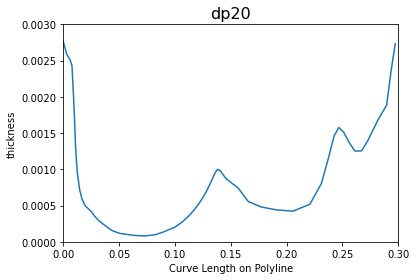

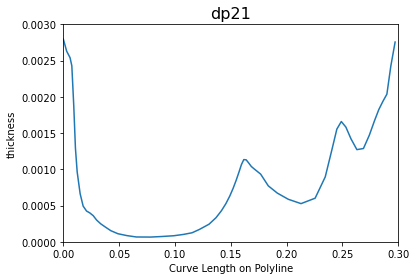

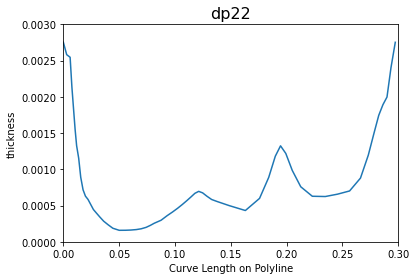

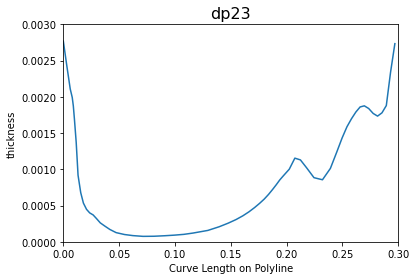

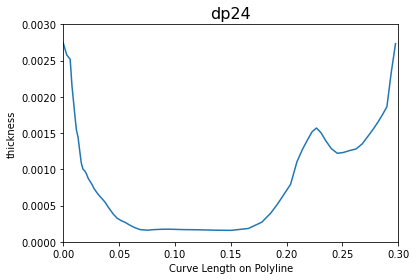

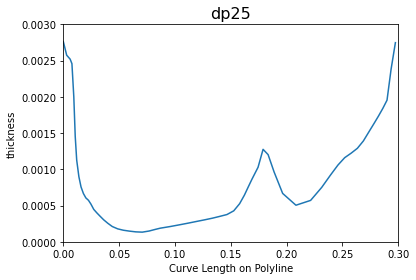

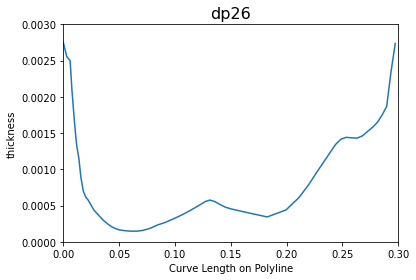

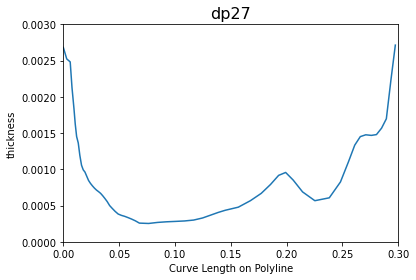

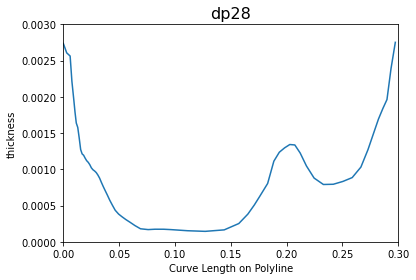

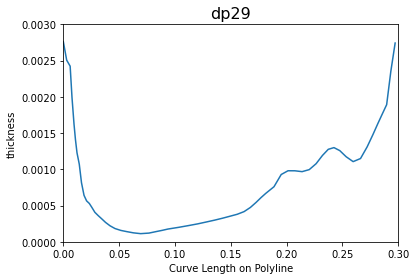

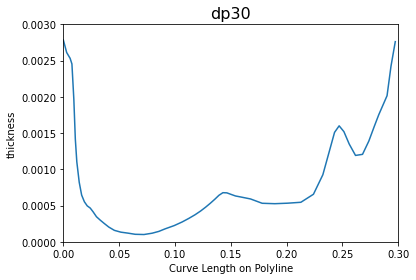

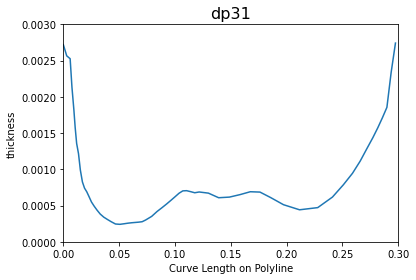

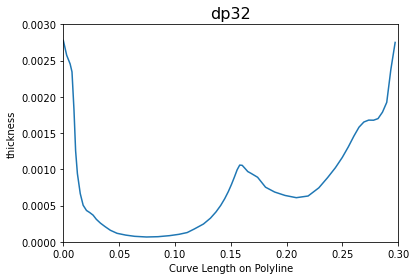

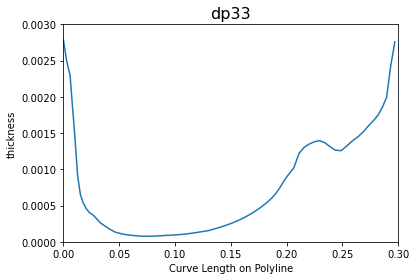

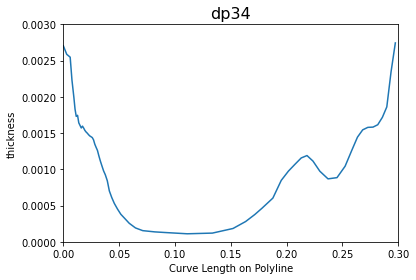

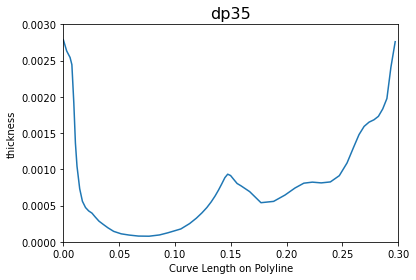

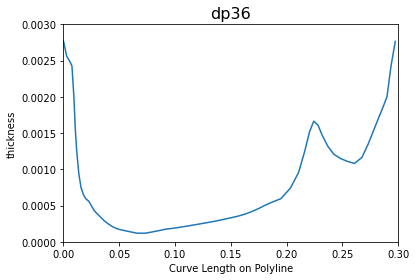

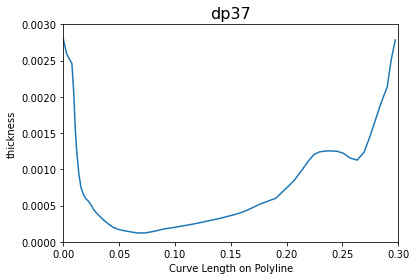

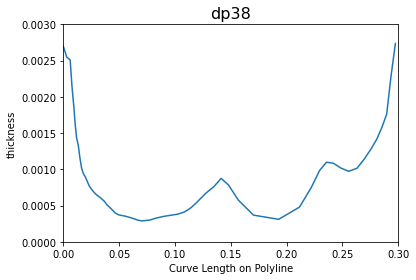

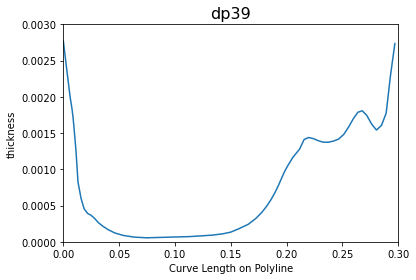

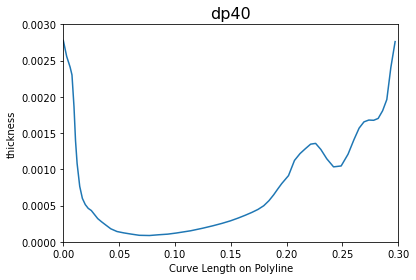

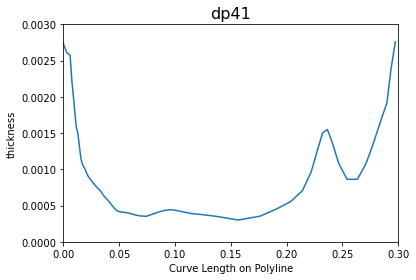

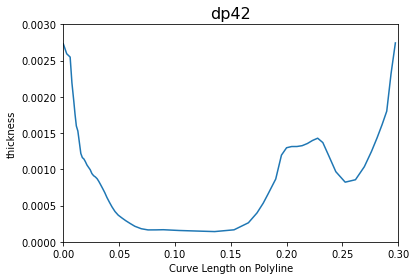

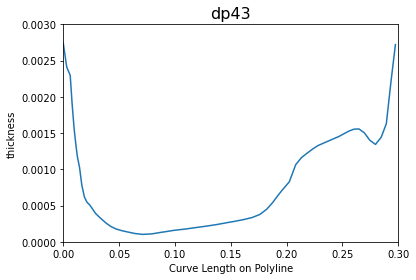

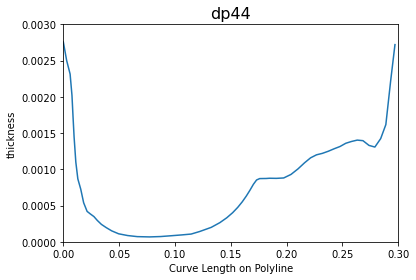

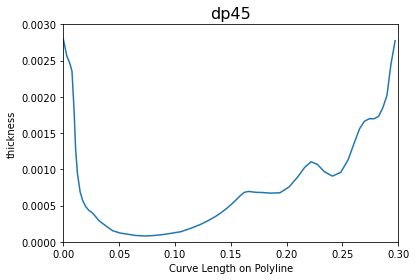

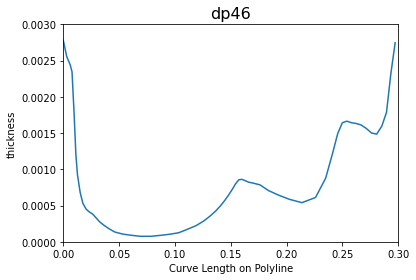

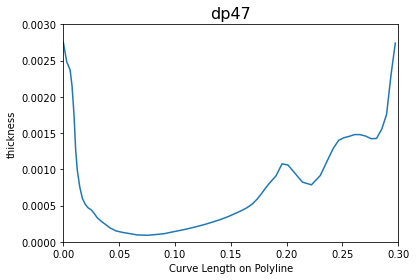

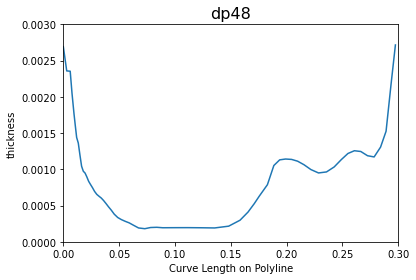

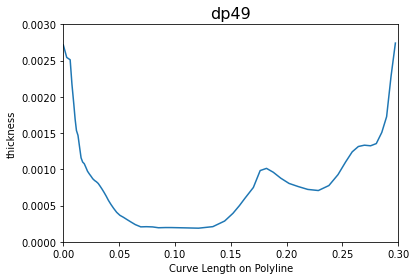

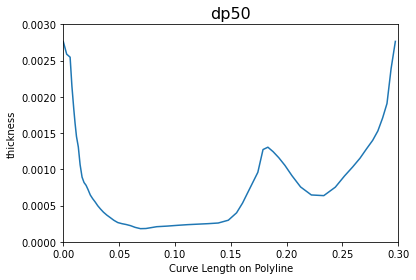

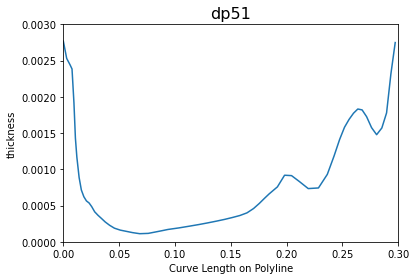

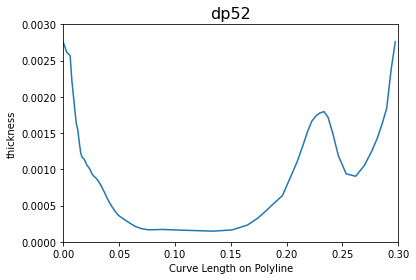

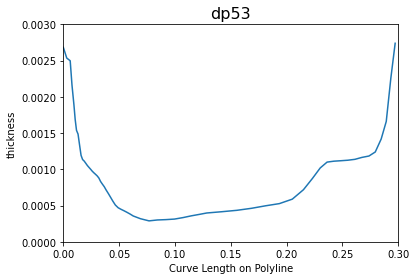

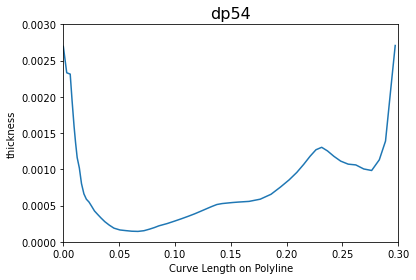

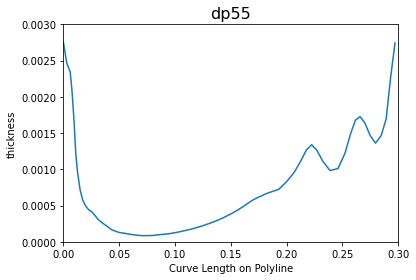

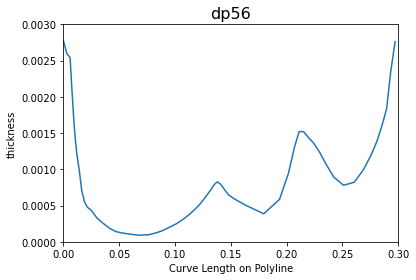

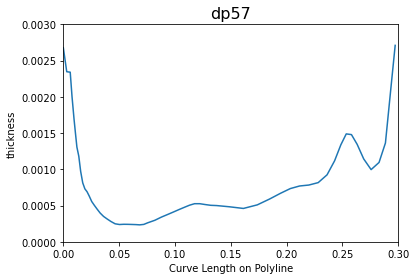

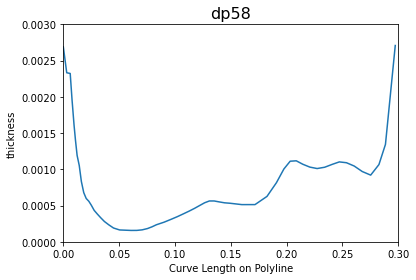

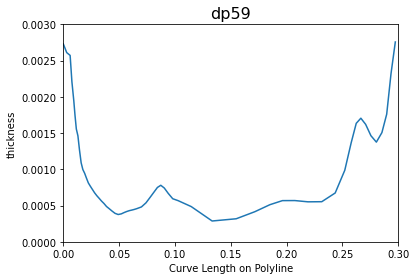

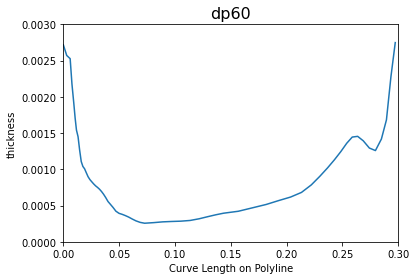

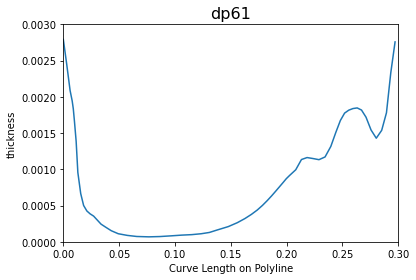

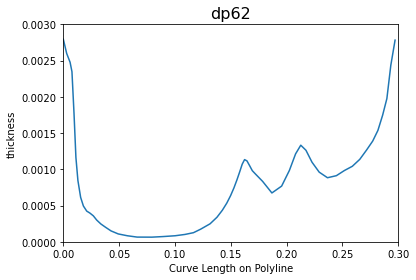

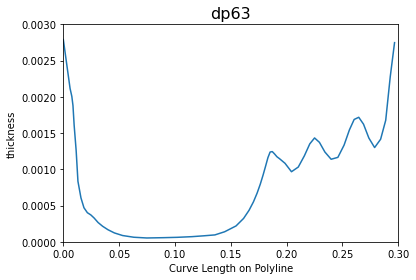

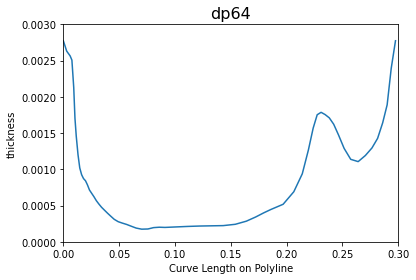

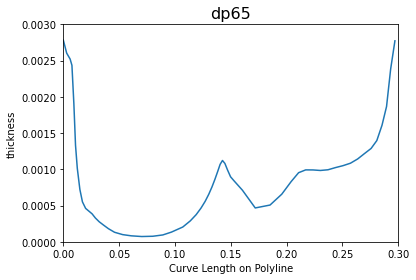

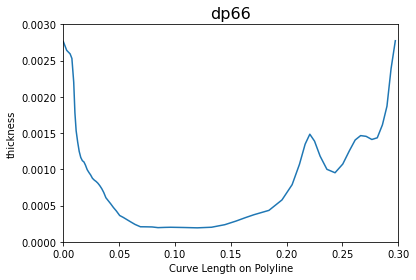

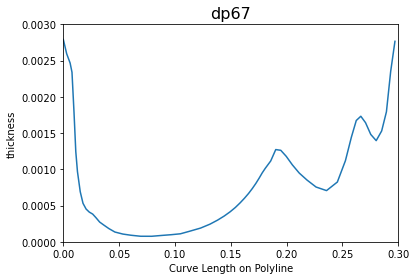

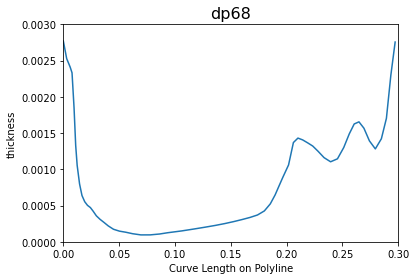

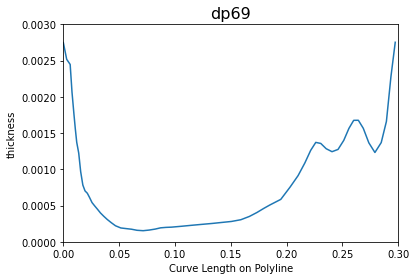

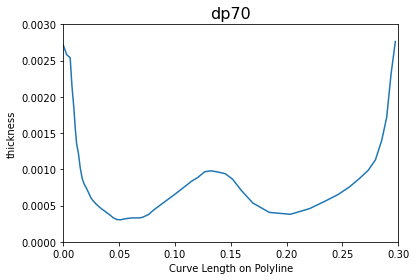

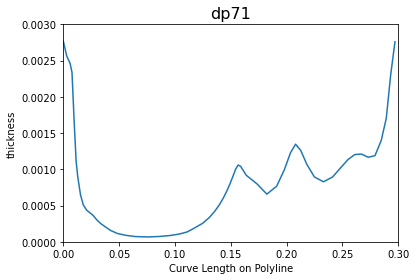

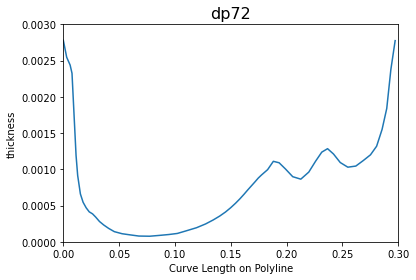

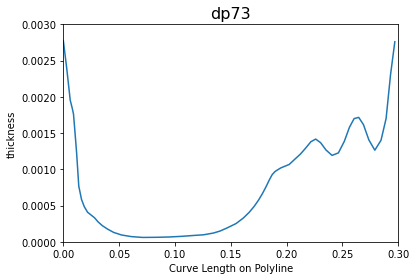

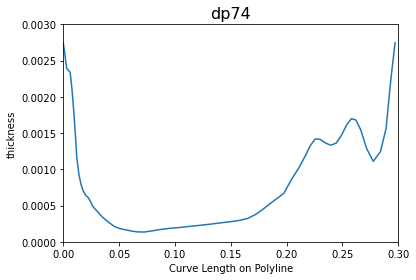

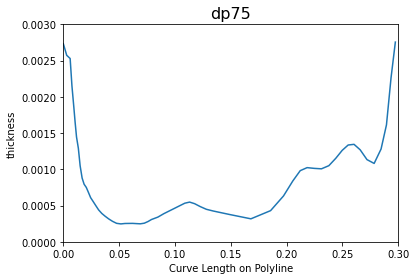

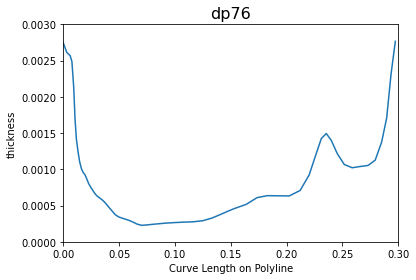

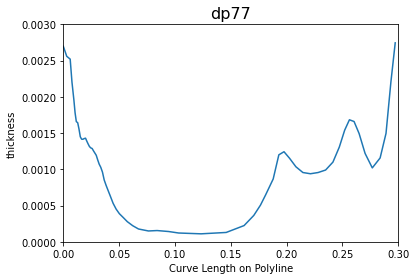

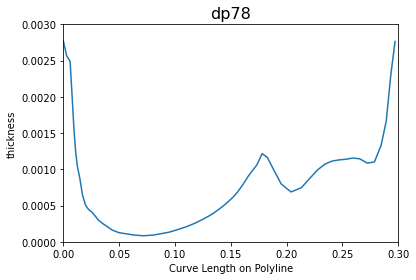

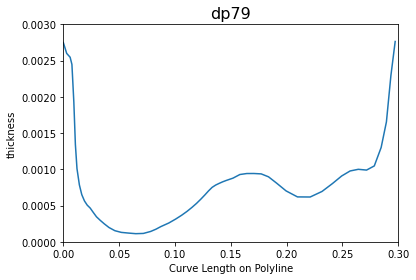

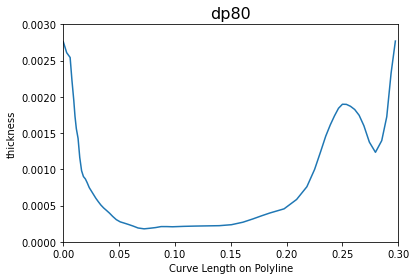

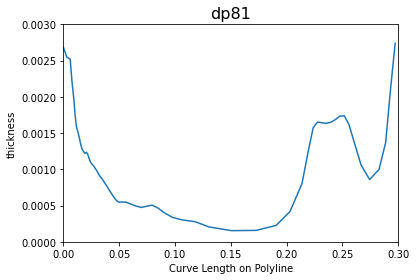

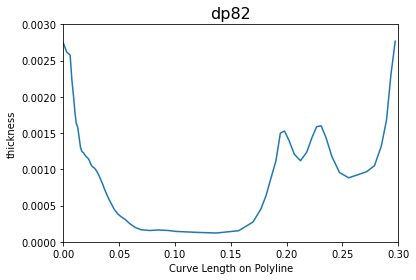

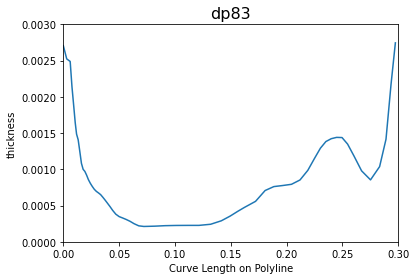

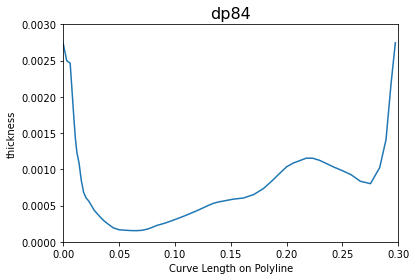

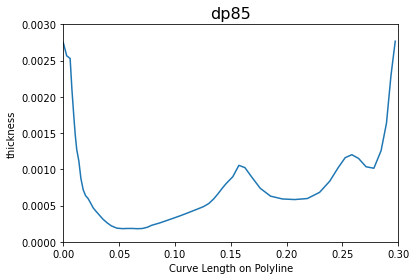

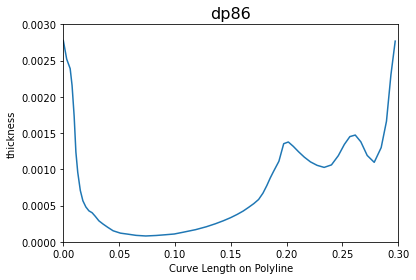

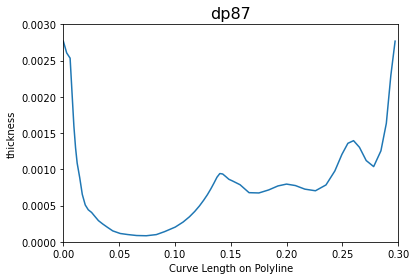

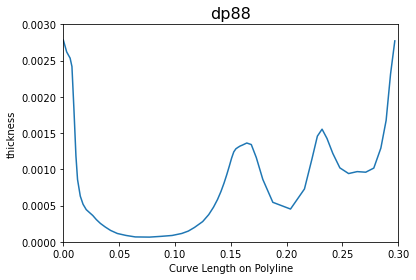

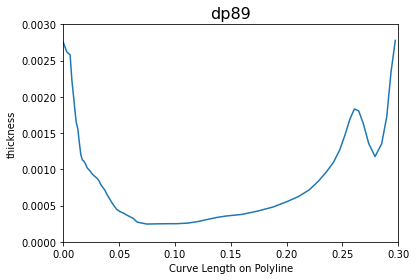

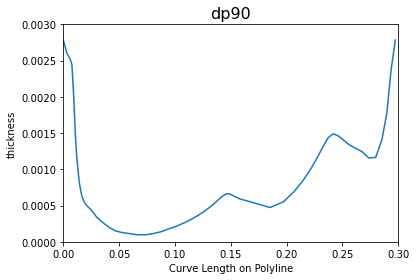

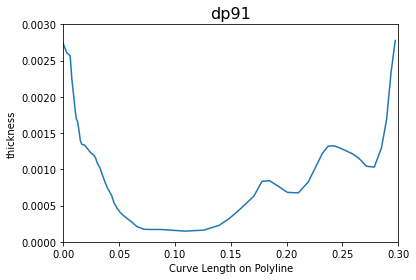

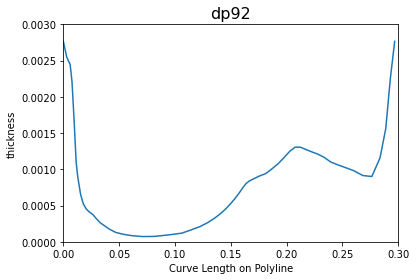

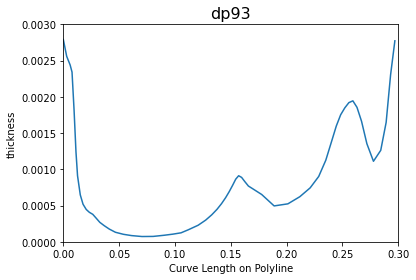

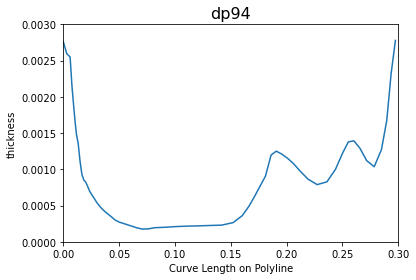

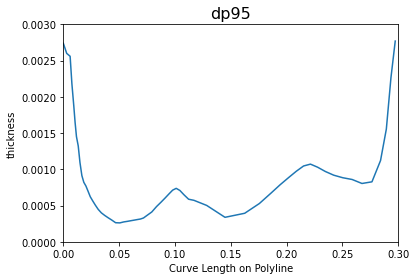

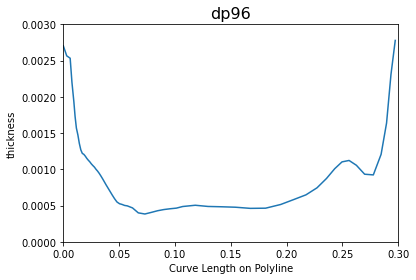

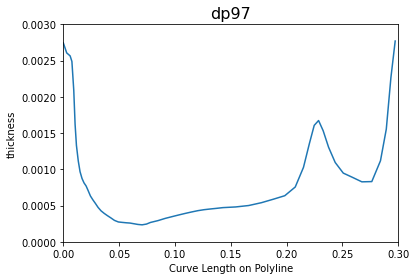

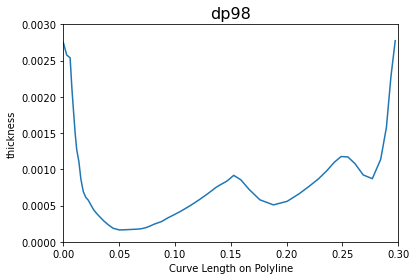

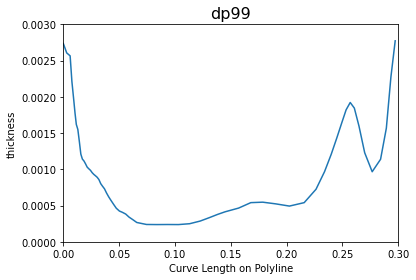

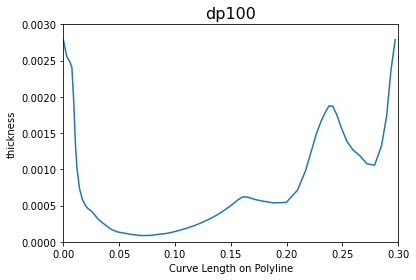

<Figure size 432x288 with 0 Axes>

In [74]:
for i in range (100):
    s = "plt.plot(thickness_dp%d.iloc[:,0],thickness_dp%d.iloc[:,1])"%(i+1,i+1)
    exec(s)
    plt.xlabel("Curve Length on Polyline")
    plt.ylabel("thickness")
    plt.xlim(0,0.3)
    plt.ylim(0,0.003)
    plt.title("dp%d"%(i+1),fontsize = 16)
#     plt.savefig("C:/Users/SDML/Desktop/blow thickness plot/dp%d_thickness plot.jpg"%(i+1))
    plt.show()
    plt.clf()

    

In [115]:
thickness_dp1.iloc[-1,0]-0.06863

0.228856633

front cut index :  6
back cut index :  14


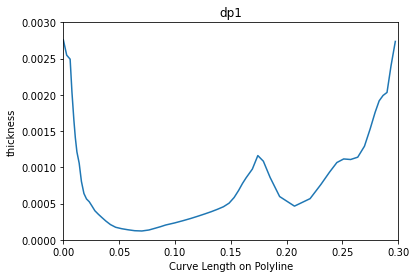

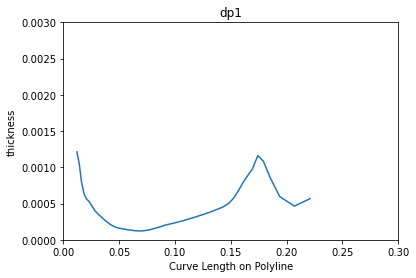

In [116]:
# 앞뒤 자르기 ( 극소값기준 자르기)
for i in range (thickness_dp1.shape[0]):
    if thickness_dp1.iloc[i,0]>0.01168:
        front_cut_index = i
        print("front cut index : ",front_cut_index)
        break
        
front_cut_thickness_dp1 = thickness_dp1.iloc[front_cut_index:,:]
front_cut_thickness_dp1

thickness_dp1_reverse = thickness_dp1[::-1]

for j in range (thickness_dp1_reverse.shape[0]):
    if thickness_dp1_reverse.iloc[j,0]<(thickness_dp1.iloc[-1,0]-0.06863):
        back_cut_index = j
        print("back cut index : ",back_cut_index)
        break
        
cut_thickness_dp1 = front_cut_thickness_dp1.iloc[:-back_cut_index,:]
cut_thickness_dp1

plt.title("dp1")
plt.xlabel("Curve Length on Polyline")
plt.ylabel("thickness")
plt.xlim(0,0.3)
plt.ylim(0,0.003)
plt.plot(thickness_dp1.iloc[:,0],thickness_dp1.iloc[:,1])
plt.show()
plt.clf()

plt.title("dp1")
plt.xlabel("Curve Length on Polyline")
plt.ylabel("thickness")
plt.xlim(0,0.3)
plt.ylim(0,0.003)
plt.plot(cut_thickness_dp1.iloc[:,0],cut_thickness_dp1.iloc[:,1])
plt.show()


# 뚜껑과 바닥부분 curvelength 측정한 뒤 슬라이스

In [ ]:
for k in range (1):
    s = "temp_thick_data = thickness_dp%d"%(k+1);exec(s)
    for i in range (temp_thick_data.shape[0]):
        if temp_thick_data.iloc[i,1]<temp_thick_data.iloc[i+1,1]:
            front_cut_index = i
#             print("front cut index : ",front_cut_index)
            break

    front_cut_temp_thick_data = temp_thick_data.iloc[front_cut_index:,:]

    temp_thick_data_reverse = temp_thick_data[::-1]

    for j in range (temp_thick_data_reverse.shape[0]):
        if temp_thick_data_reverse.iloc[j,1]<temp_thick_data_reverse.iloc[j+1,1]:
            back_cut_index = j
#             print("back cut index : ",back_cut_index)
            break

    cut_temp_thick_data = front_cut_temp_thick_data.iloc[:-back_cut_index,:]
    s2 = "cut1_thickness_dp%d = cut_temp_thick_data"%(k+1);exec(s2)

# 극솟값 기준 자르기

In [84]:
# 앞뒤 자르기 ( 극소값기준 자르기)
for k in range (100):
    s = "temp_thick_data = thickness_dp%d"%(k+1);exec(s)
    for i in range (temp_thick_data.shape[0]):
        if temp_thick_data.iloc[i,1]<temp_thick_data.iloc[i+1,1]:
            front_cut_index = i
#             print("front cut index : ",front_cut_index)
            break

    front_cut_temp_thick_data = temp_thick_data.iloc[front_cut_index:,:]

    temp_thick_data_reverse = temp_thick_data[::-1]

    for j in range (temp_thick_data_reverse.shape[0]):
        if temp_thick_data_reverse.iloc[j,1]<temp_thick_data_reverse.iloc[j+1,1]:
            back_cut_index = j
#             print("back cut index : ",back_cut_index)
            break

    cut_temp_thick_data = front_cut_temp_thick_data.iloc[:-back_cut_index,:]
    s2 = "cut1_thickness_dp%d = cut_temp_thick_data"%(k+1);exec(s2)


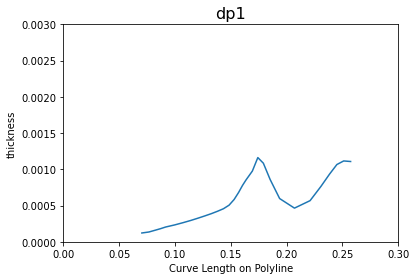

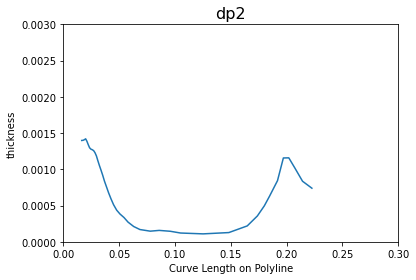

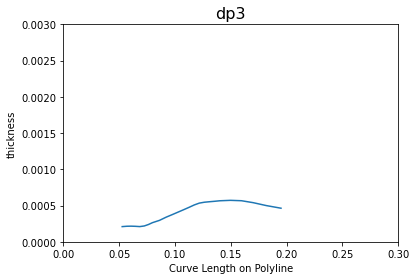

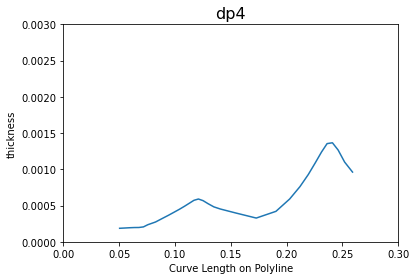

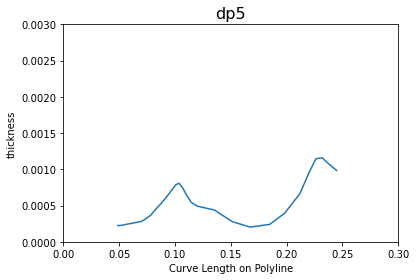

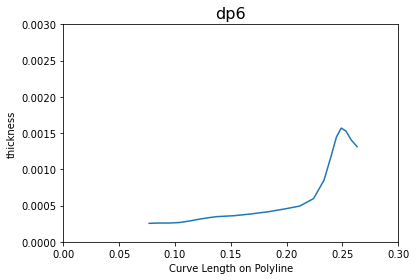

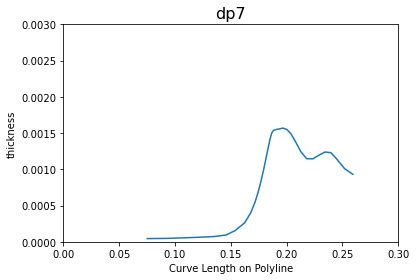

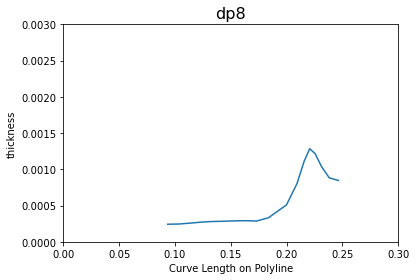

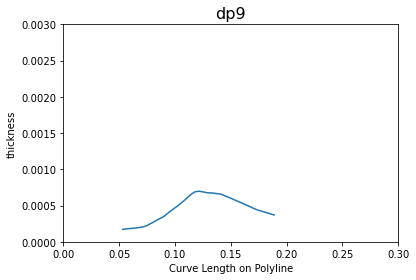

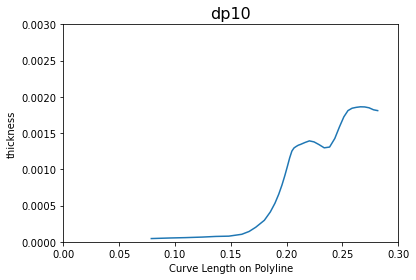

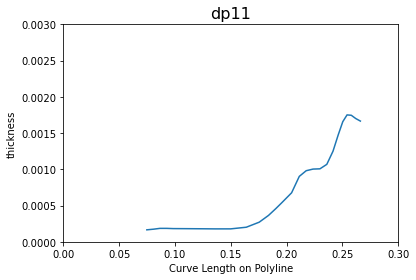

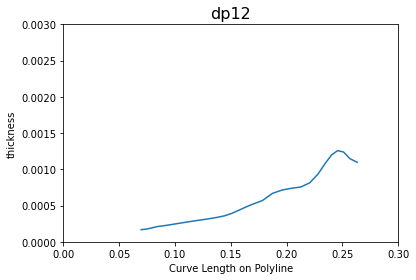

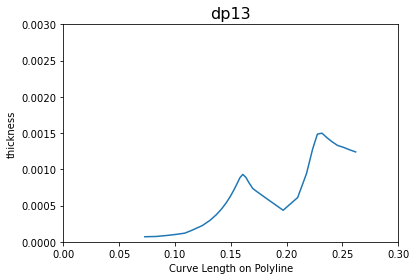

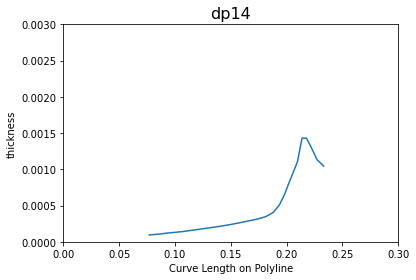

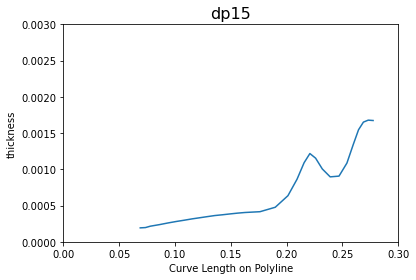

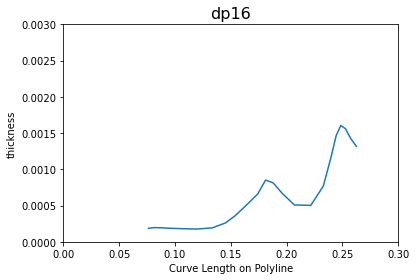

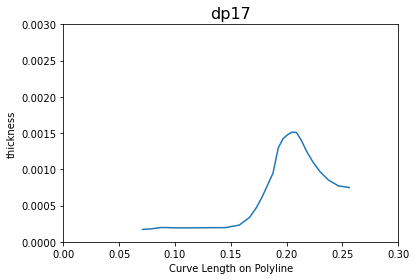

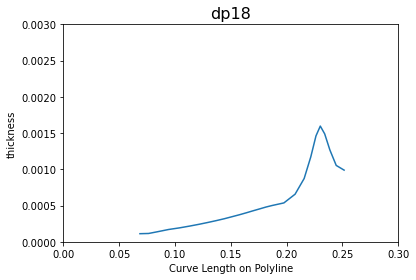

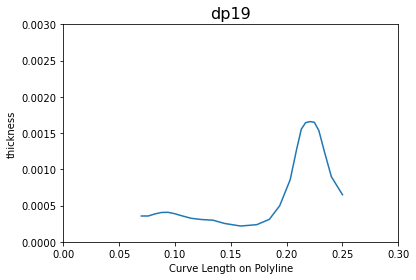

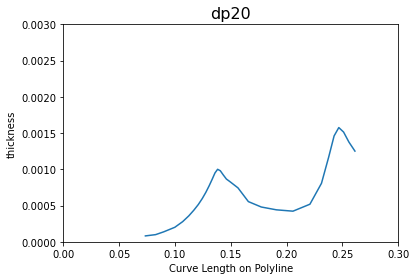

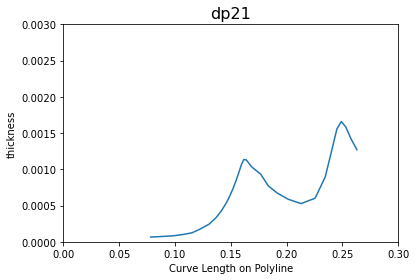

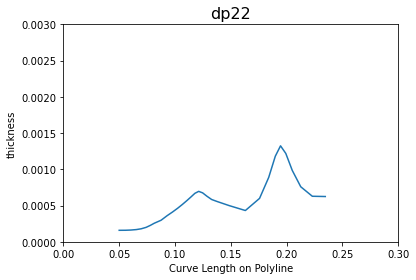

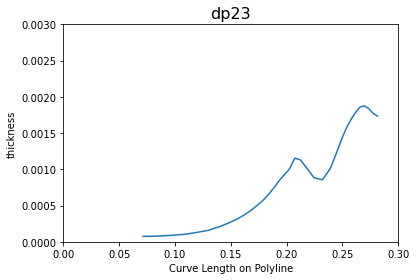

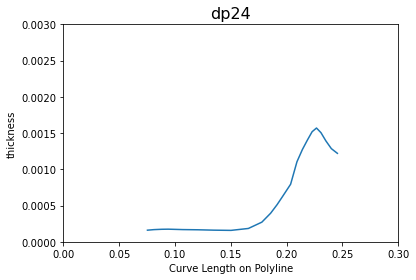

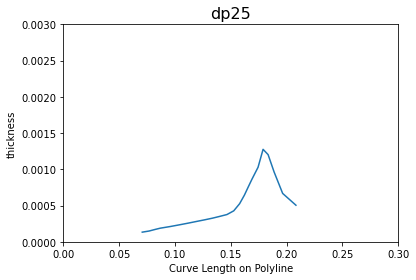

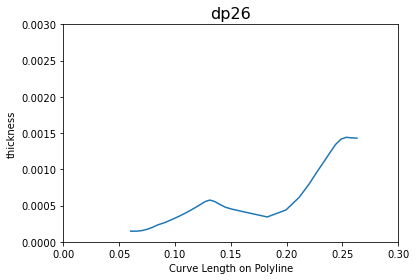

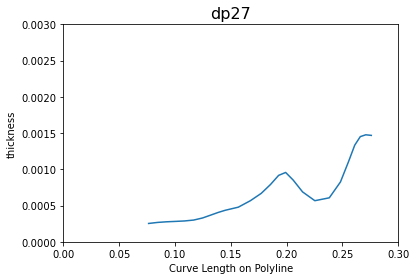

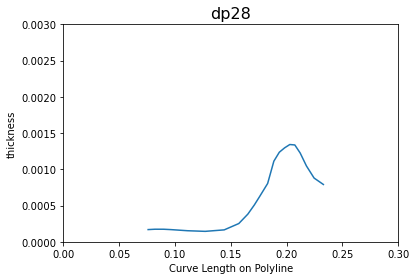

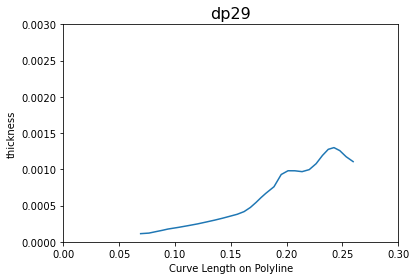

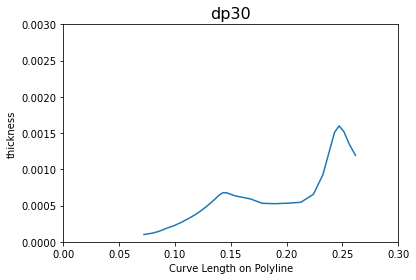

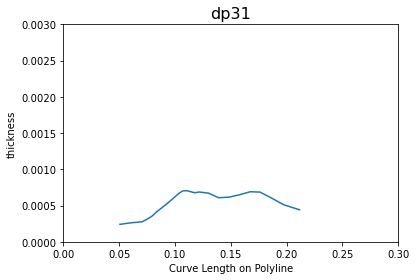

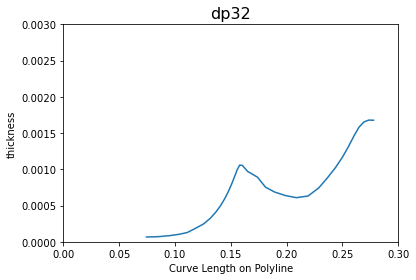

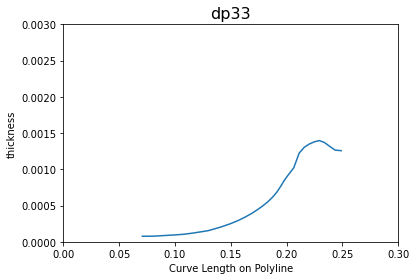

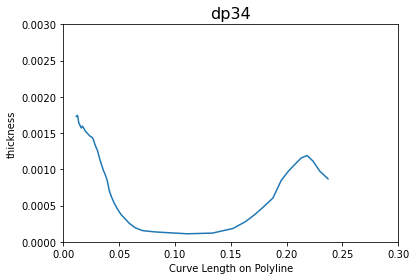

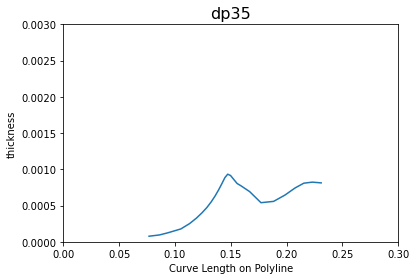

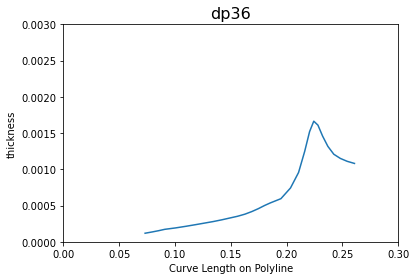

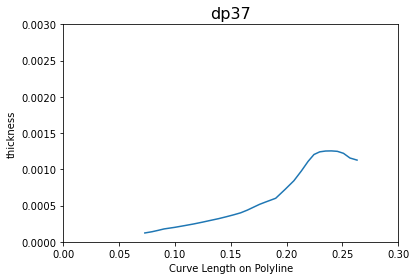

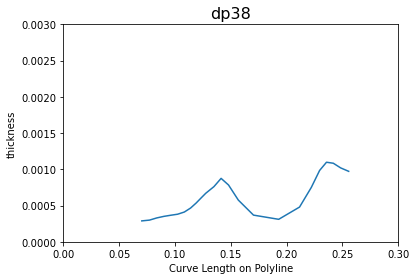

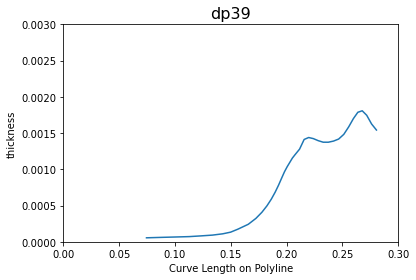

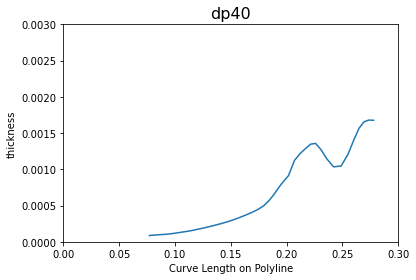

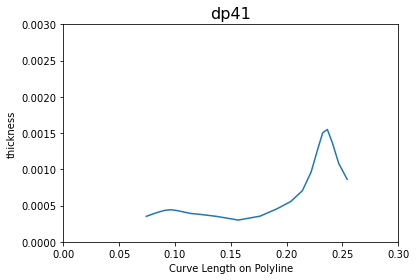

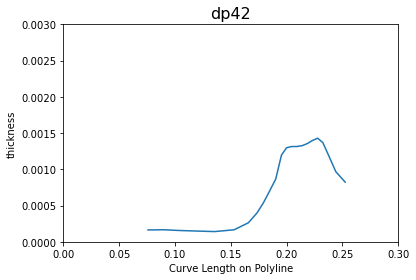

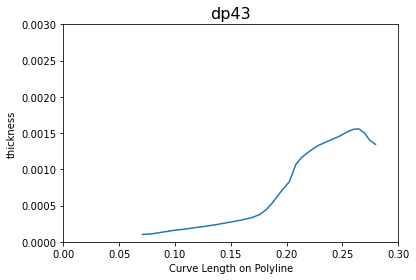

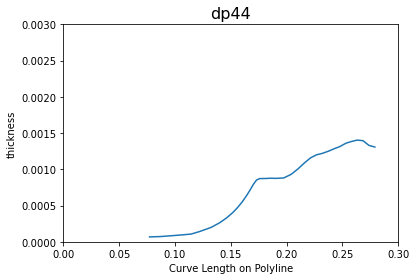

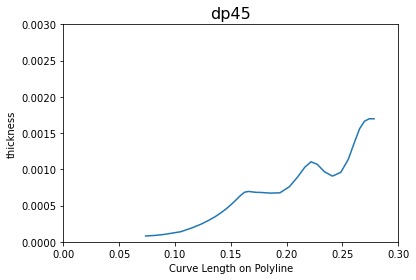

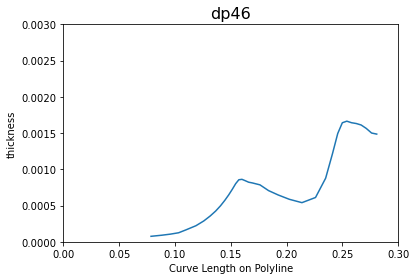

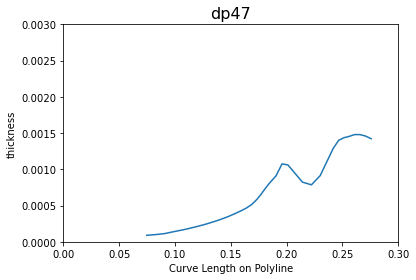

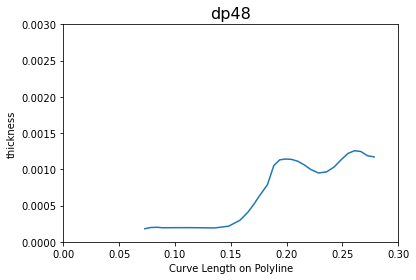

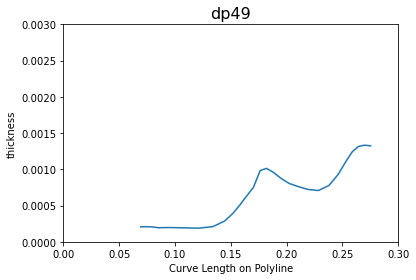

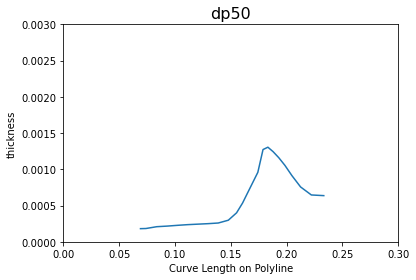

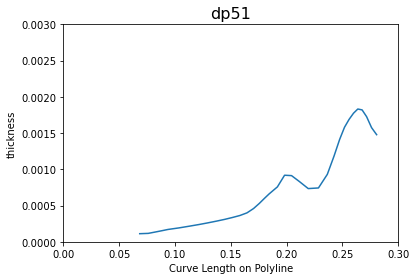

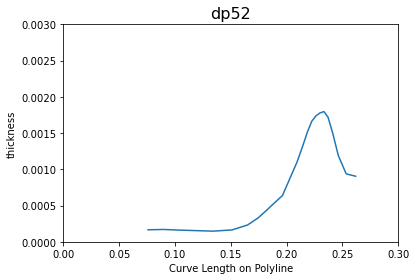

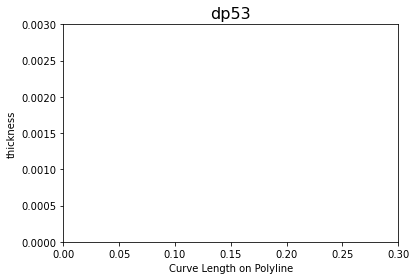

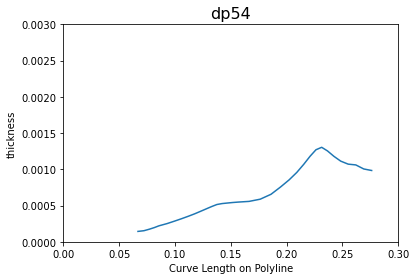

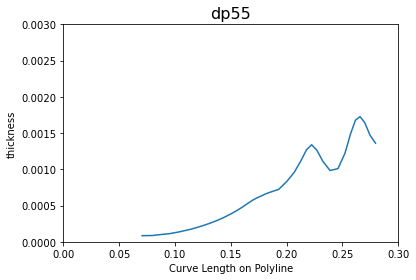

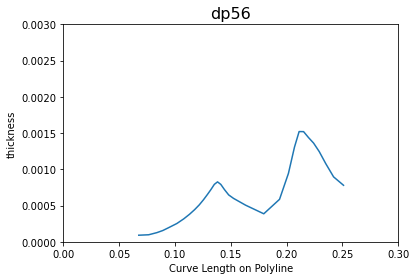

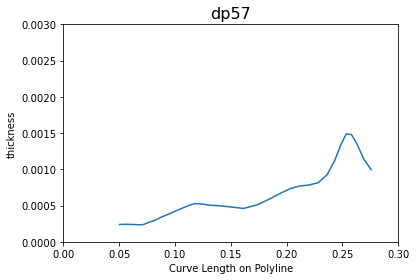

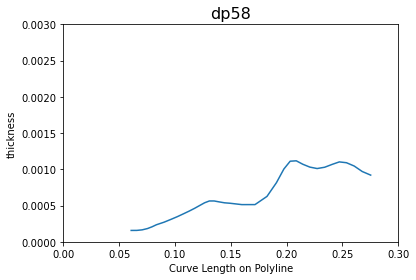

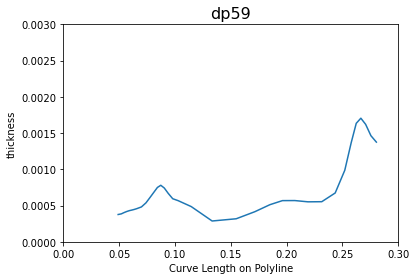

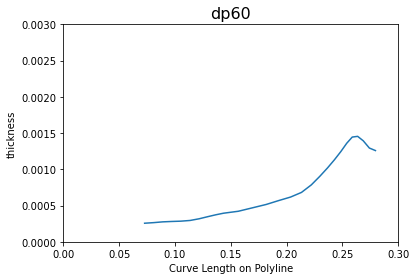

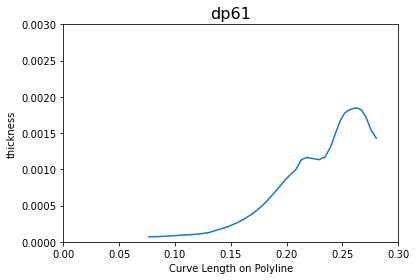

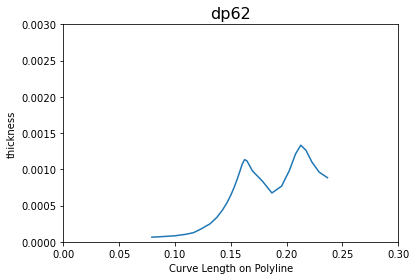

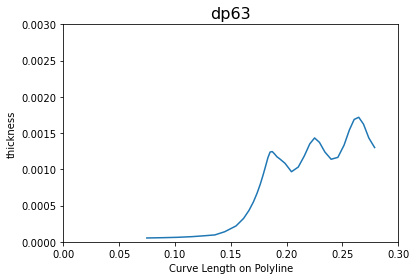

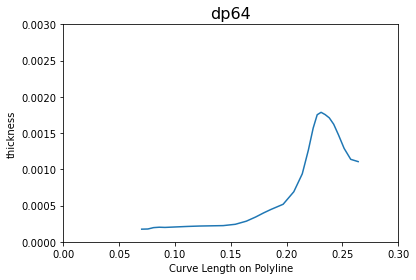

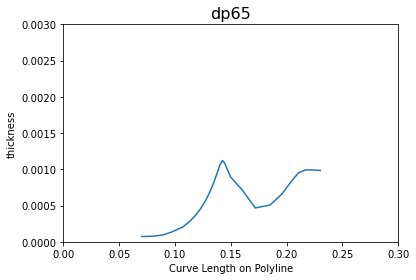

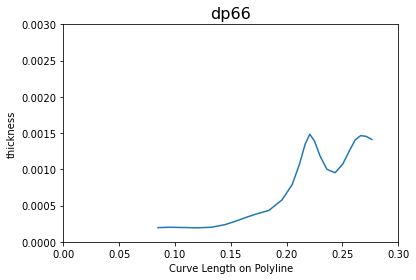

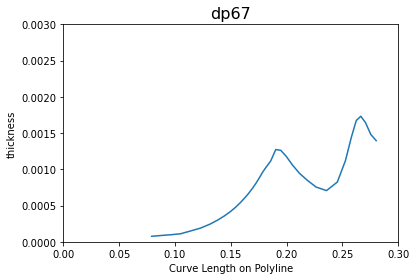

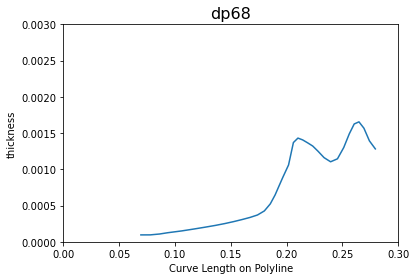

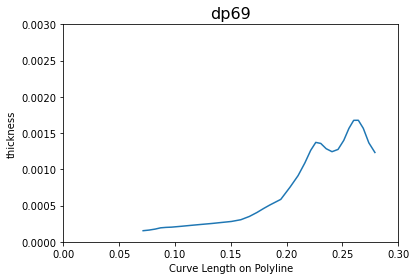

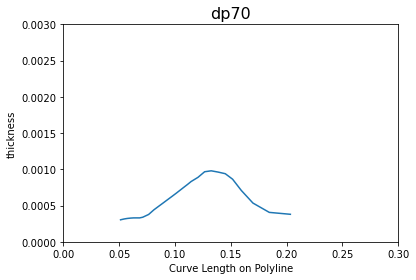

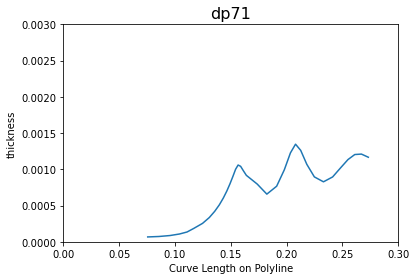

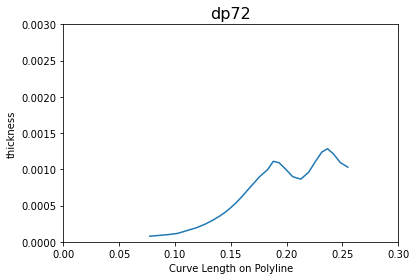

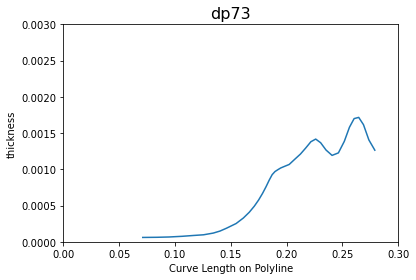

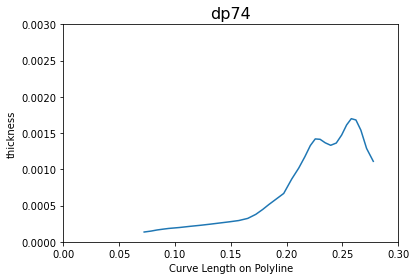

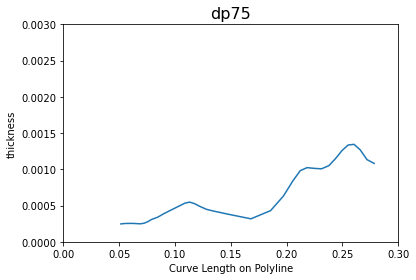

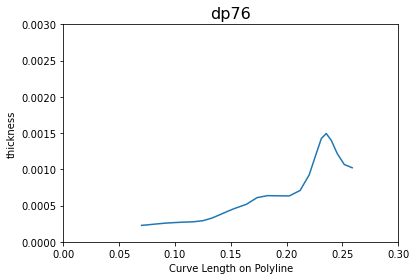

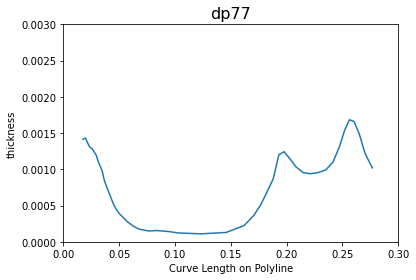

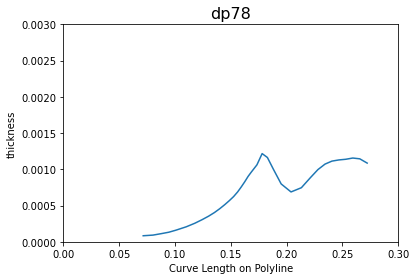

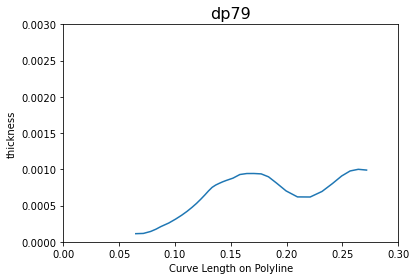

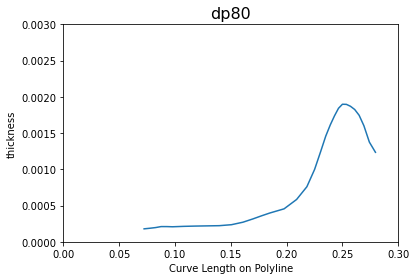

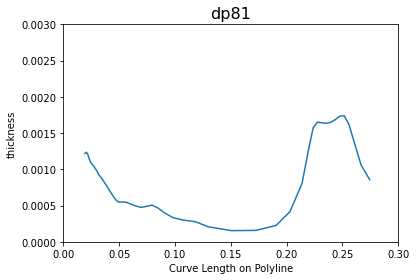

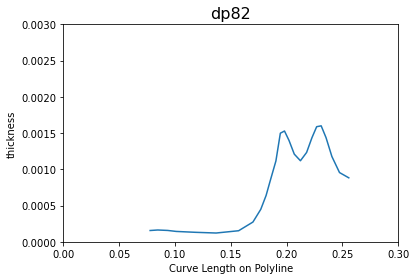

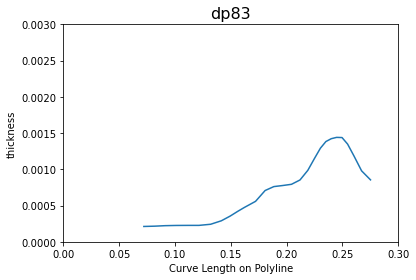

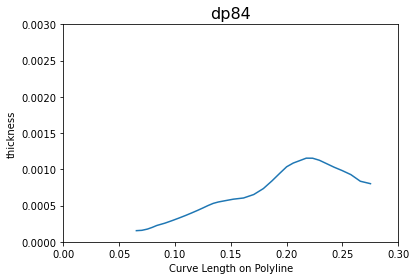

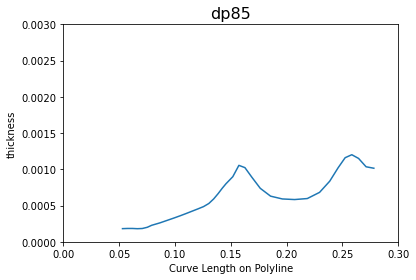

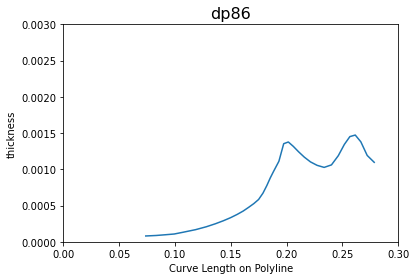

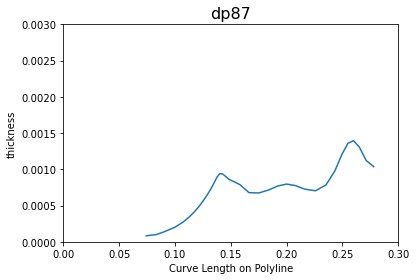

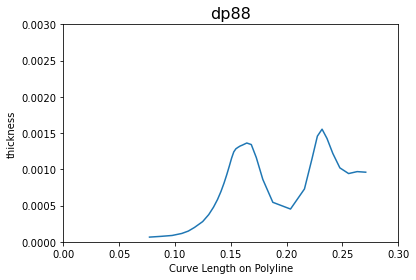

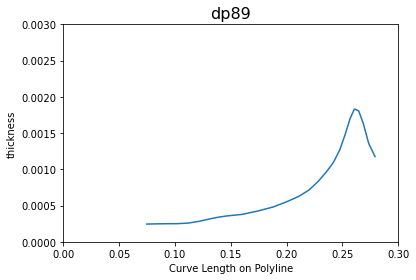

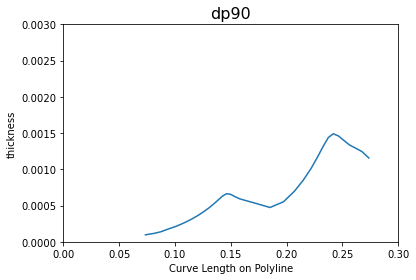

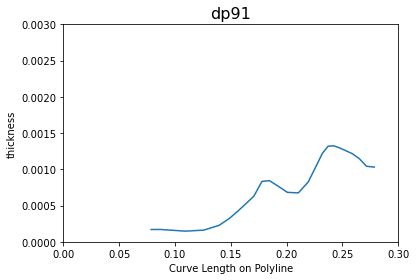

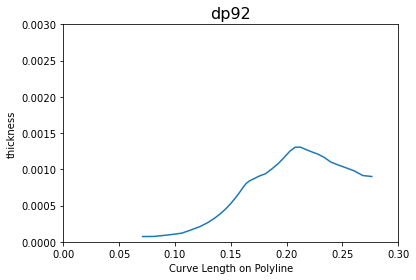

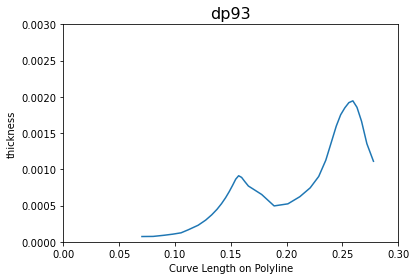

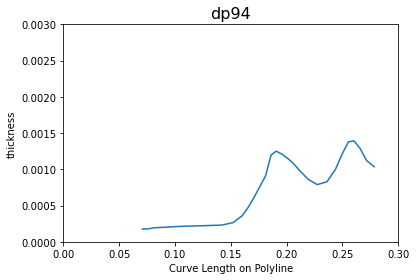

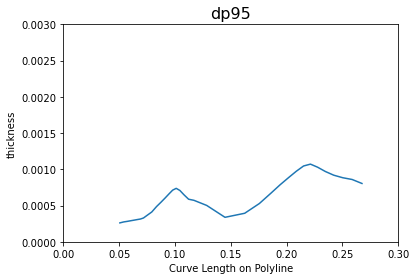

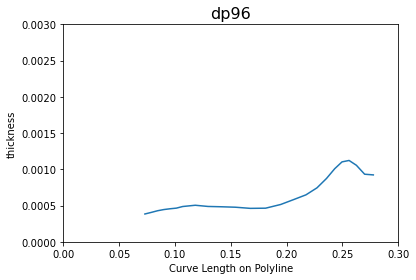

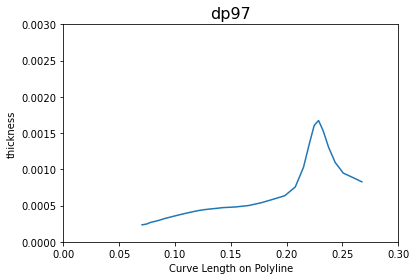

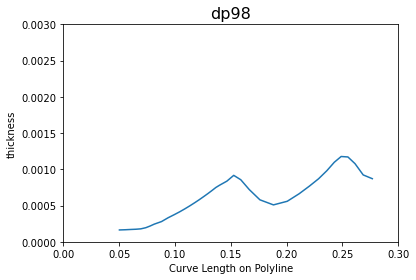

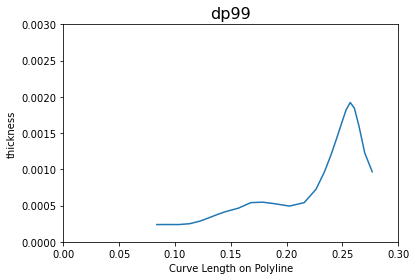

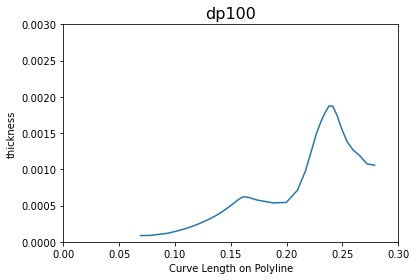

<Figure size 432x288 with 0 Axes>

In [67]:
for i in range (100):
    s = "plt.plot(cut1_thickness_dp%d.iloc[:,0],cut1_thickness_dp%d.iloc[:,1])"%(i+1,i+1)
    exec(s)
    plt.xlabel("Curve Length on Polyline")
    plt.ylabel("thickness")
    plt.xlim(0,0.3)
    plt.ylim(0,0.003)
    plt.title("dp%d"%(i+1),fontsize = 16)
    plt.savefig("C:/Users/SDML/Desktop/blow thickness plot/dp%d_thickness plot.jpg"%(i+1))
    plt.show()
    plt.clf()

    

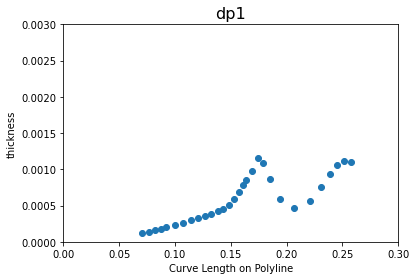

In [86]:
for i in range (1):
    s = "plt.plot(cut1_thickness_dp%d.iloc[:,0],cut1_thickness_dp%d.iloc[:,1],'o')"%(i+1,i+1)
    exec(s)
    plt.xlabel("Curve Length on Polyline")
    plt.ylabel("thickness")
    plt.xlim(0,0.3)
    plt.ylim(0,0.003)
    plt.title("dp%d"%(i+1),fontsize = 16)
    plt.show()

<Figure size 432x288 with 0 Axes>

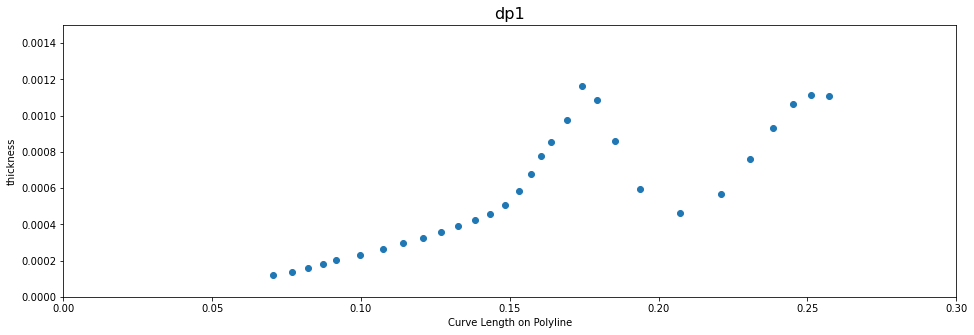

In [97]:
plt.clf()
for i in range (1):
    plt.figure(figsize = (16,5))
    s = "plt.plot(cut1_thickness_dp%d.iloc[:,0],cut1_thickness_dp%d.iloc[:,1],'o')"%(i+1,i+1)
    exec(s)
    plt.xlabel("Curve Length on Polyline")
    plt.ylabel("thickness")
    plt.xlim(0,0.3)
    plt.ylim(0,0.0015)
    plt.title("dp%d"%(i+1),fontsize = 16)
    plt.show()
    

# 특정 두께 이하 포인트에서 자르기

In [79]:
# 앞뒤 자르기 ( 특정두께 이하)
for i in range (thickness_dp1.shape[0]):
    if thickness_dp1.iloc[i,1] < 0.0015:
        front_cut_index = i
        print("front cut index : ",front_cut_index)
        break
        
front_cut_thickness_dp1 = thickness_dp1.iloc[front_cut_index:,:]
front_cut_thickness_dp1

thickness_dp1_reverse = thickness_dp1[::-1]

for j in range (thickness_dp1_reverse.shape[0]):
    if thickness_dp1_reverse.iloc[j,1] < 0.0015:
        back_cut_index = j
        print("back cut index : ",back_cut_index)
        break
        
cut_thickness_dp1 = front_cut_thickness_dp1.iloc[:-back_cut_index,:]
# cut_thickness_dp1

# plt.xlim(0,0.3)
# plt.ylim(0,0.003)
# plt.plot(thickness_dp1.iloc[:,0],thickness_dp1.iloc[:,1])
# plt.show()
# plt.clf()
# plt.xlim(0,0.3)
# plt.ylim(0,0.003)
# plt.plot(cut_thickness_dp1.iloc[:,0],cut_thickness_dp1.iloc[:,1])
# plt.show()


front cut index :  5
back cut index :  7


In [81]:
# 앞뒤 자르기 ( 극소값기준 자르기)
for k in range (100):
    s = "temp_thick_data = thickness_dp%d"%(k+1);exec(s)
    for i in range (temp_thick_data.shape[0]):
        if temp_thick_data.iloc[i,1]<0.0015:
            front_cut_index = i
#             print("front cut index : ",front_cut_index)
            break

    front_cut_temp_thick_data = temp_thick_data.iloc[front_cut_index:,:]

    temp_thick_data_reverse = temp_thick_data[::-1]

    for j in range (temp_thick_data_reverse.shape[0]):
        if temp_thick_data_reverse.iloc[j,1]<0.0015:
            back_cut_index = j
#             print("back cut index : ",back_cut_index)
            break

    cut2_temp_thick_data = front_cut_temp_thick_data.iloc[:-back_cut_index,:]
    s2 = "cut2_thickness_dp%d = cut2_temp_thick_data"%(k+1);exec(s2)


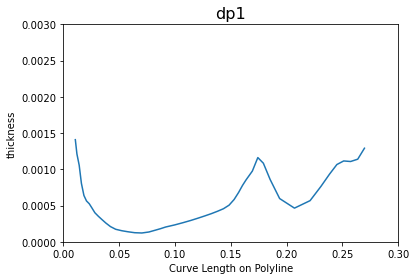

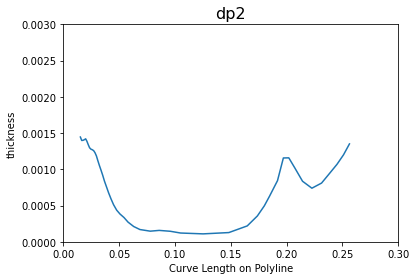

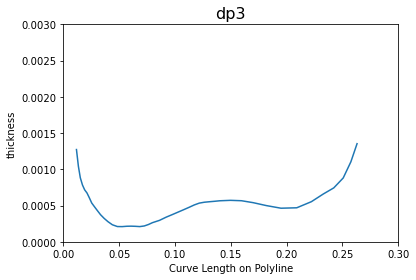

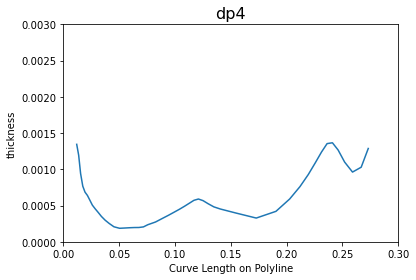

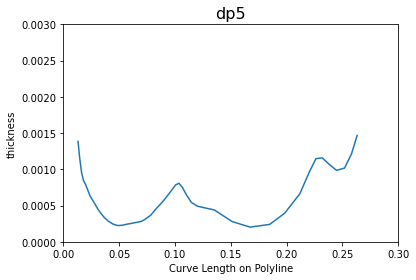

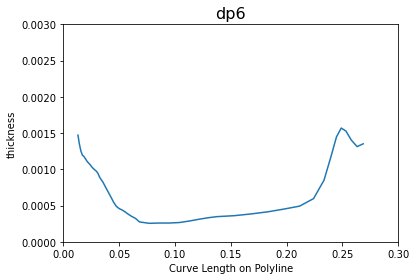

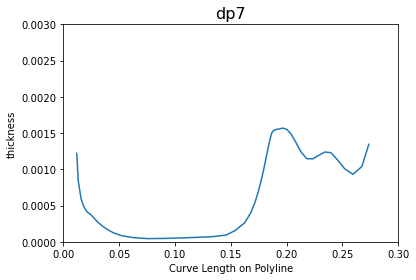

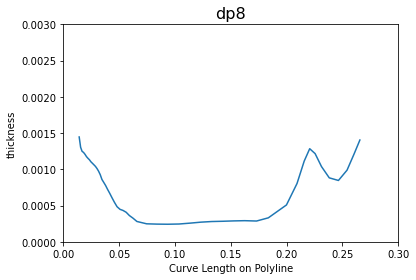

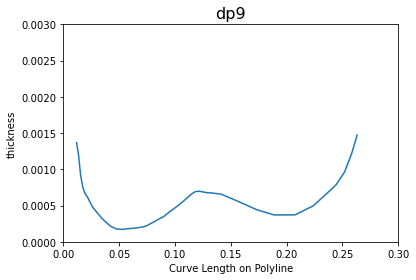

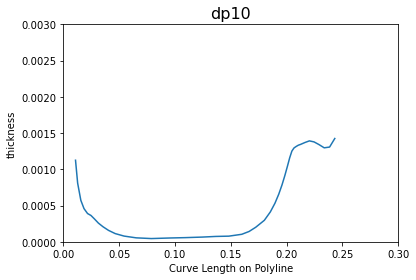

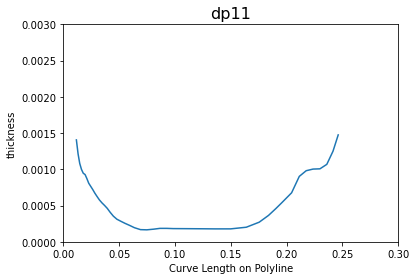

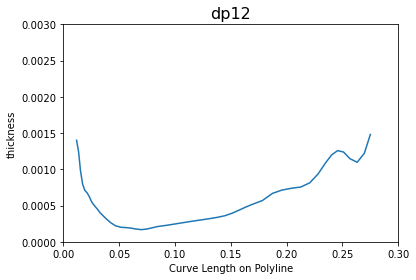

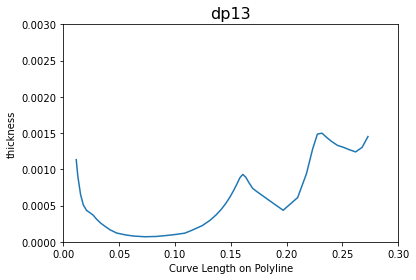

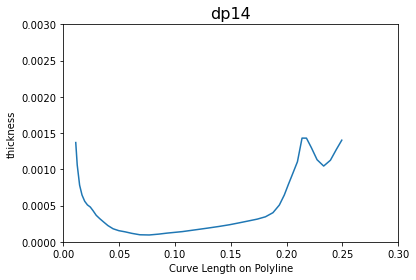

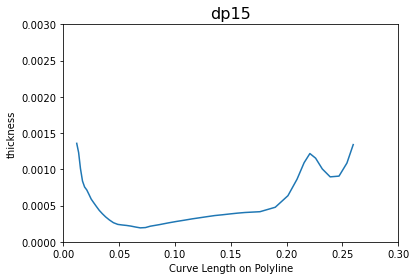

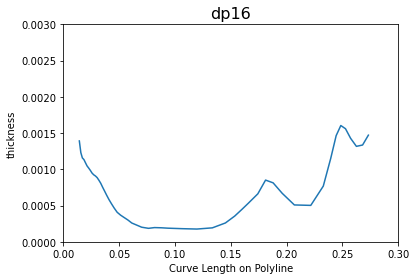

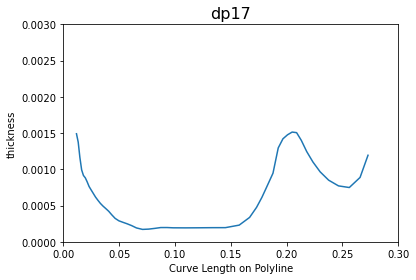

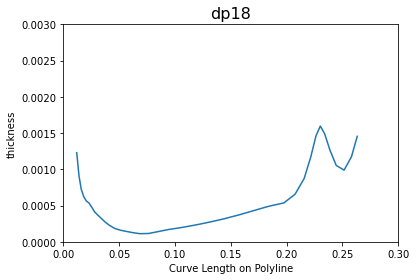

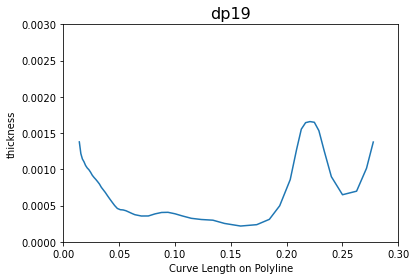

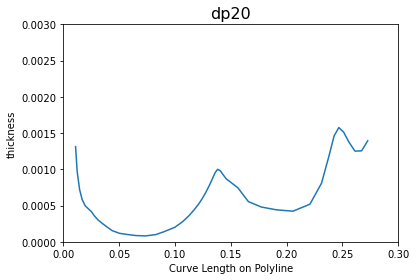

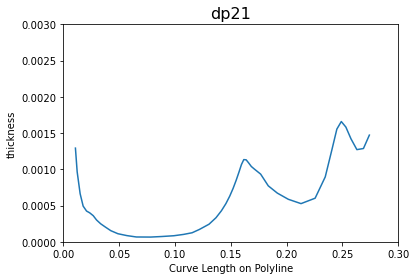

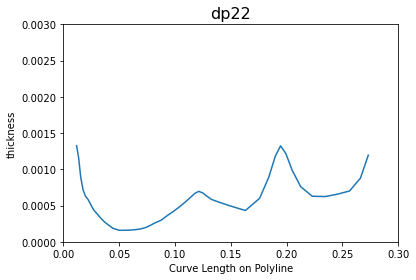

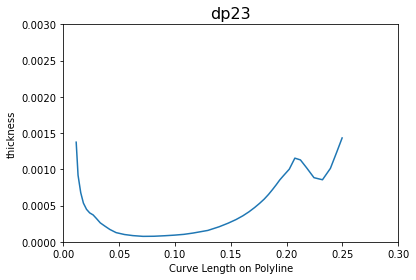

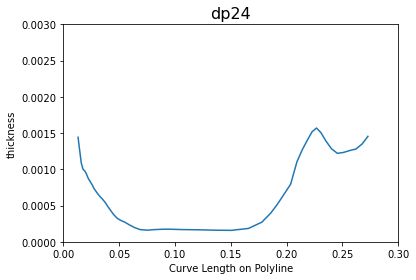

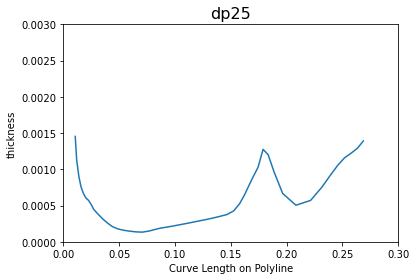

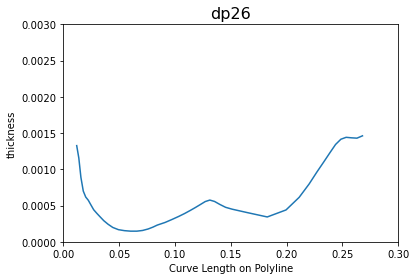

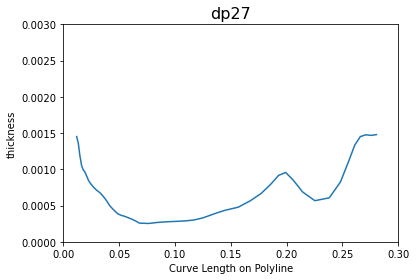

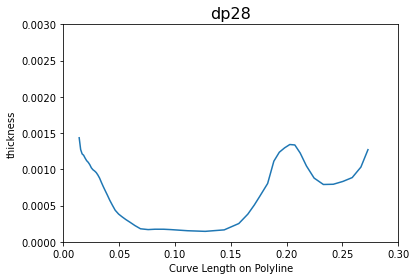

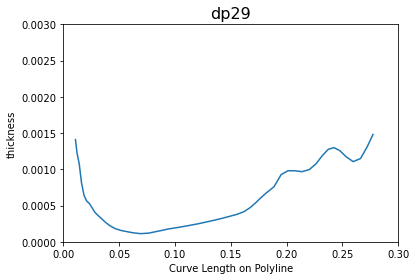

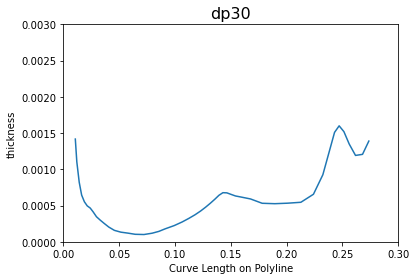

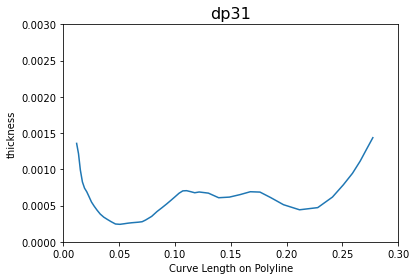

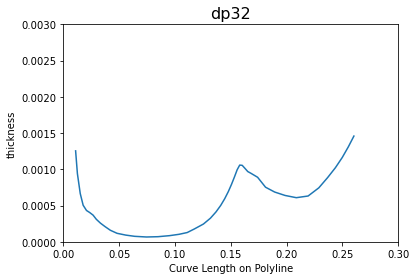

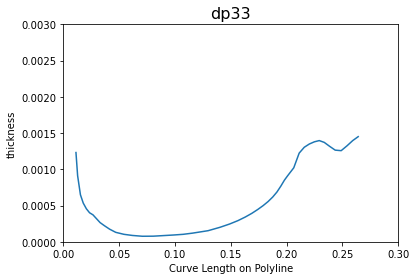

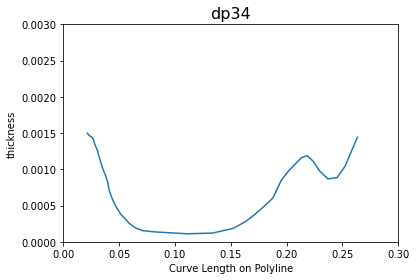

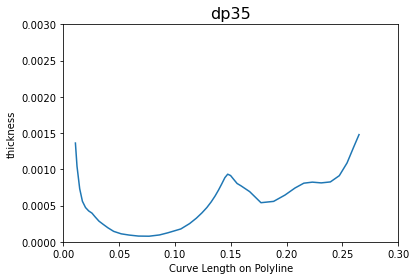

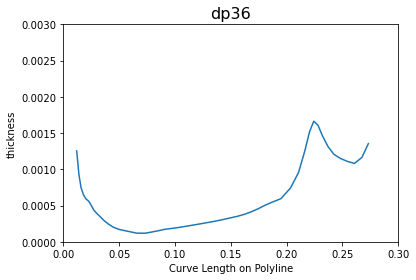

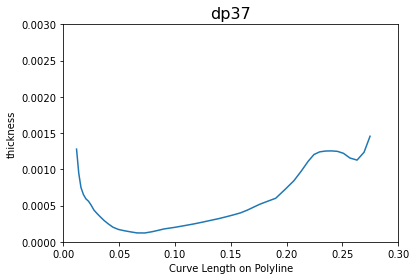

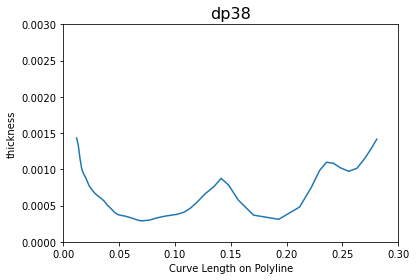

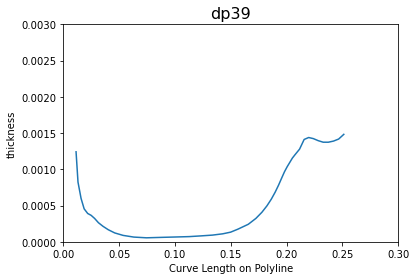

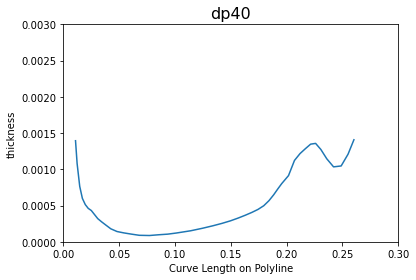

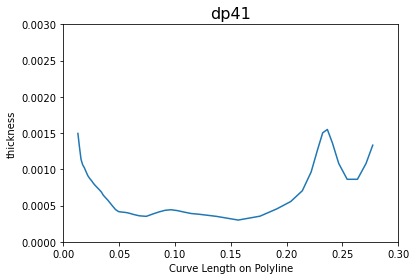

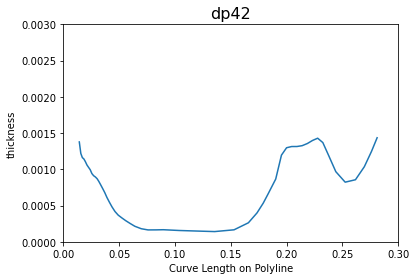

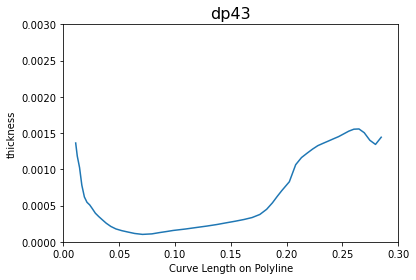

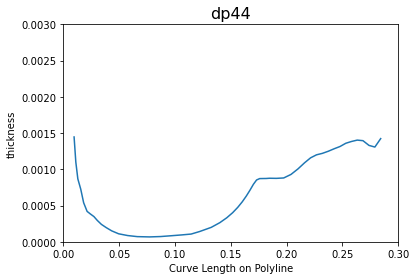

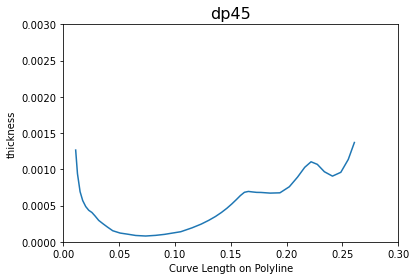

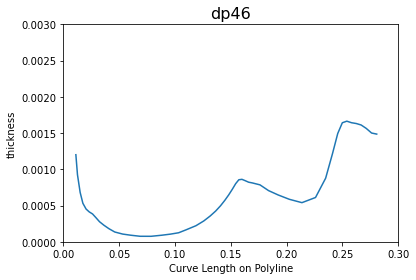

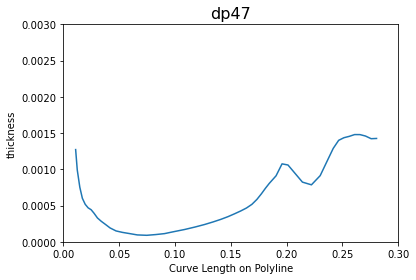

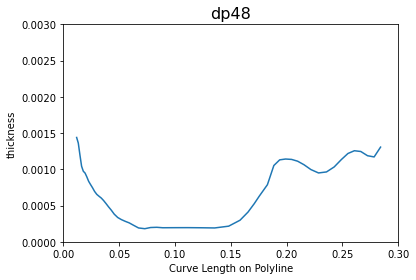

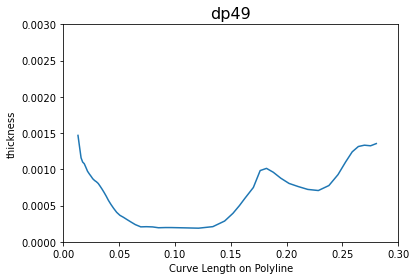

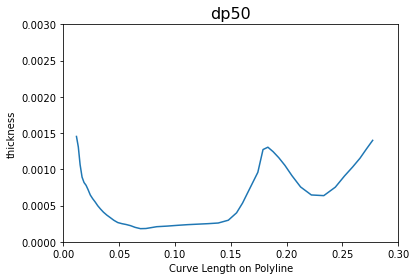

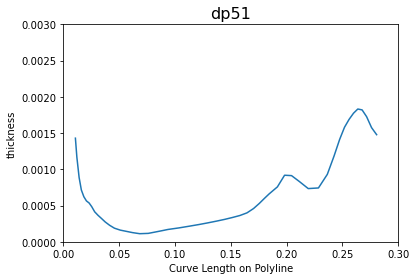

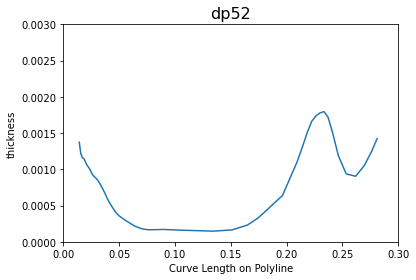

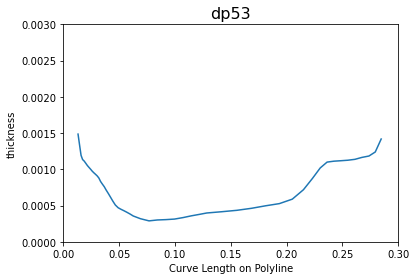

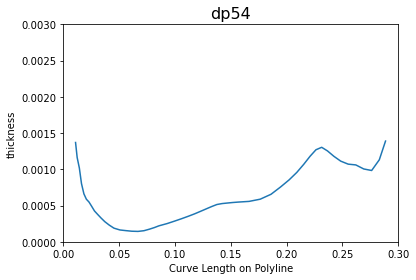

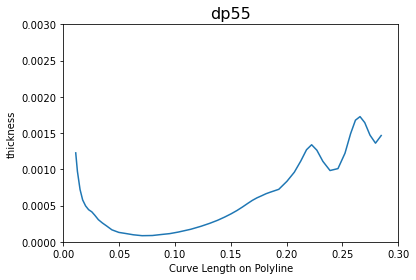

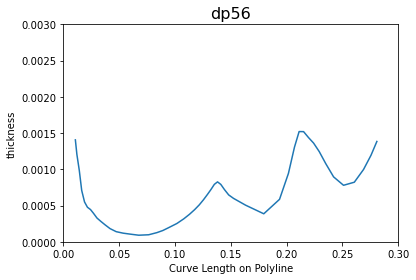

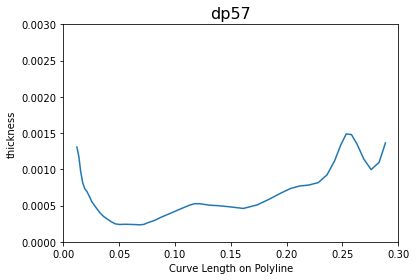

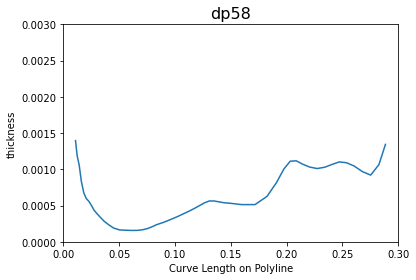

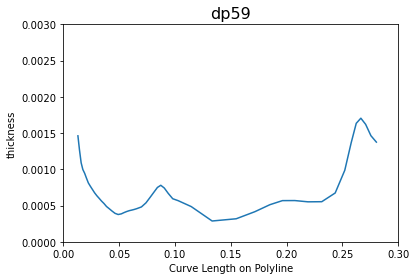

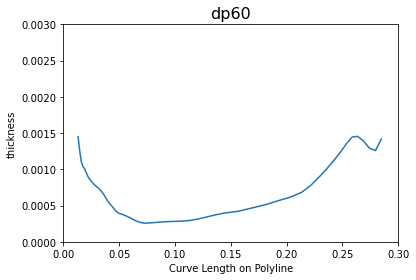

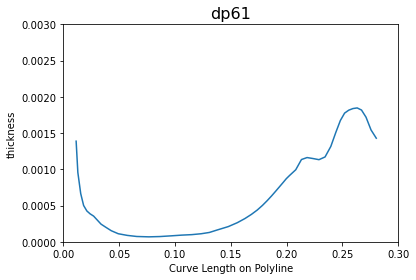

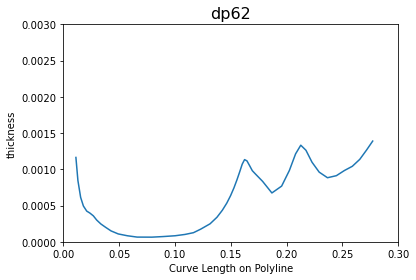

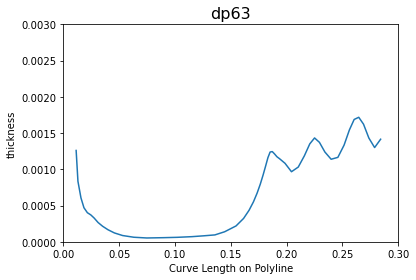

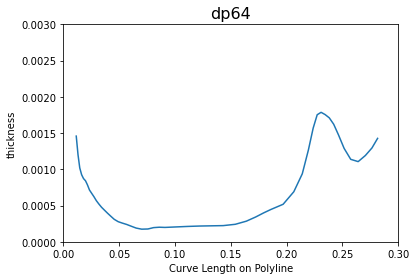

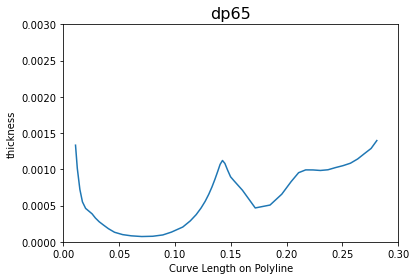

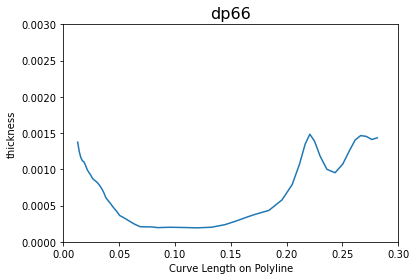

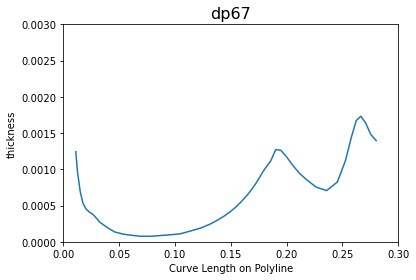

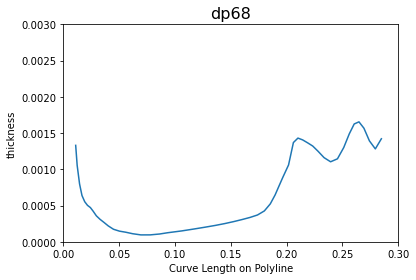

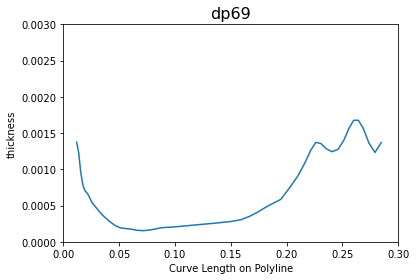

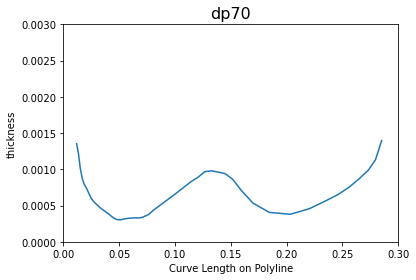

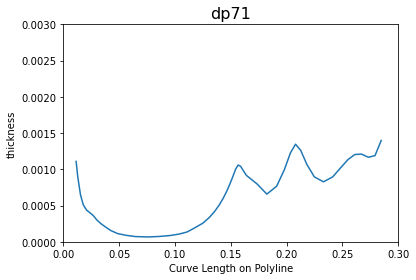

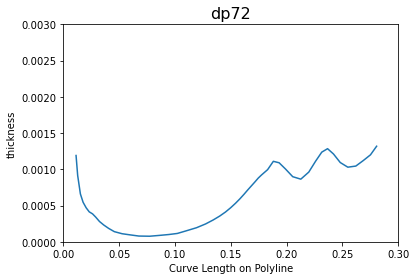

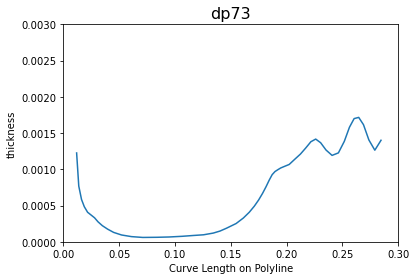

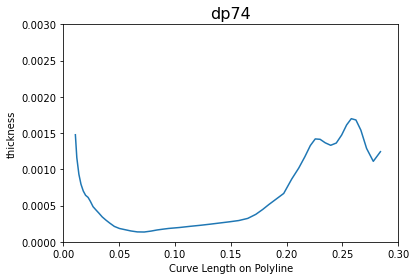

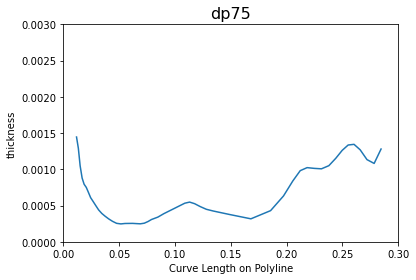

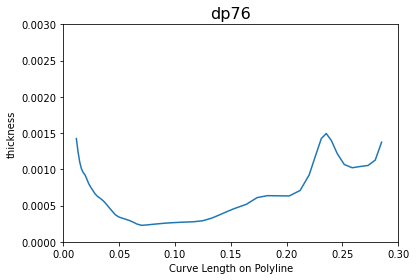

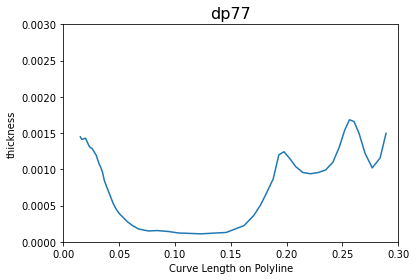

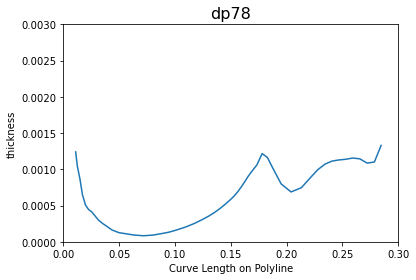

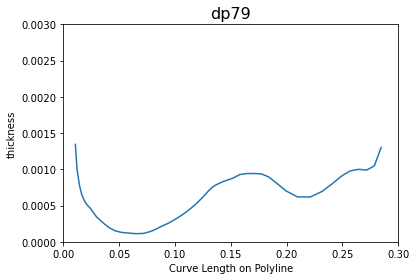

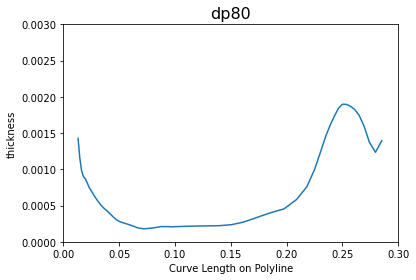

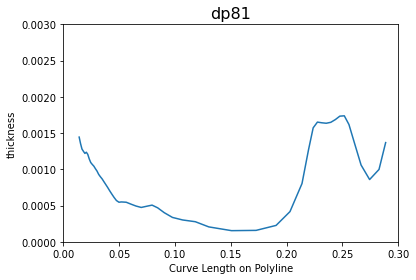

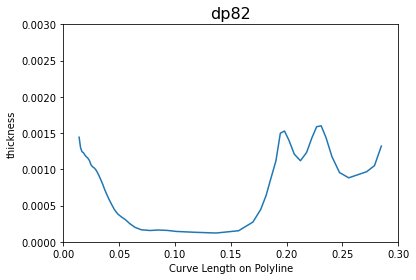

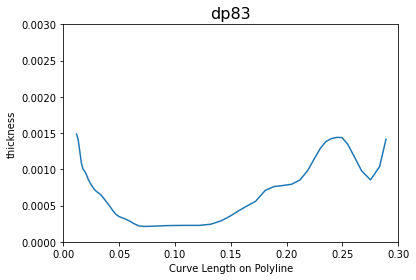

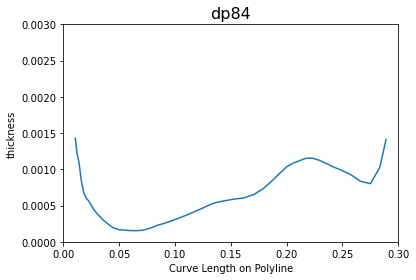

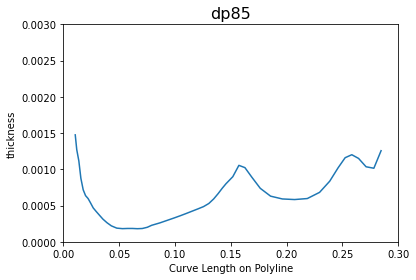

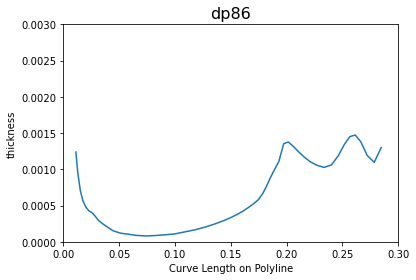

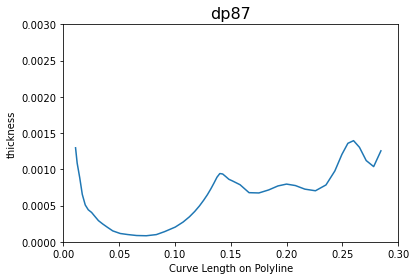

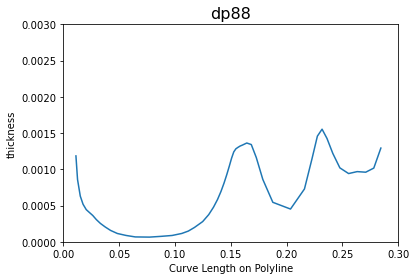

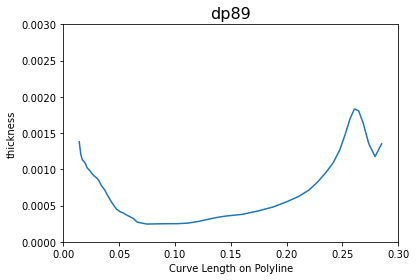

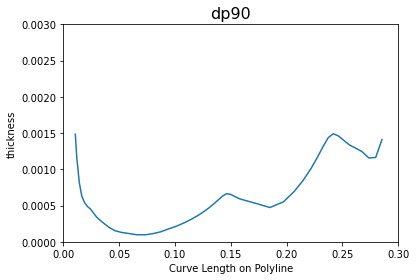

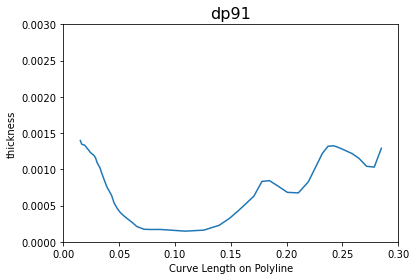

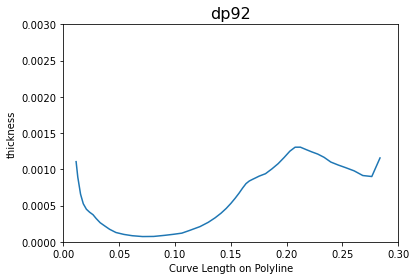

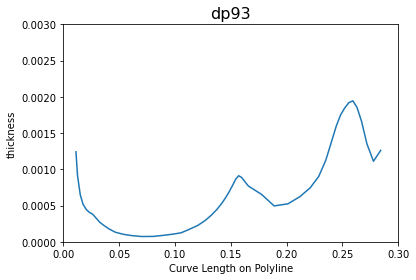

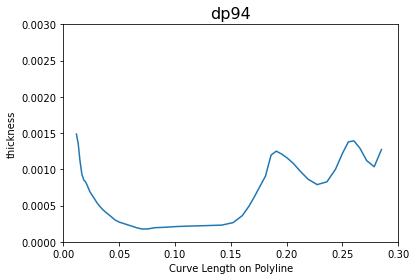

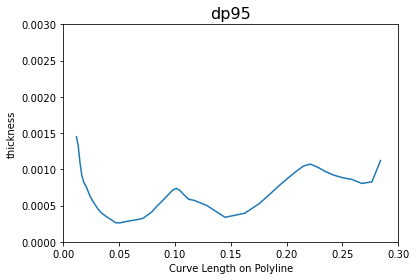

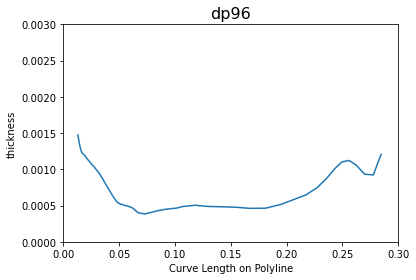

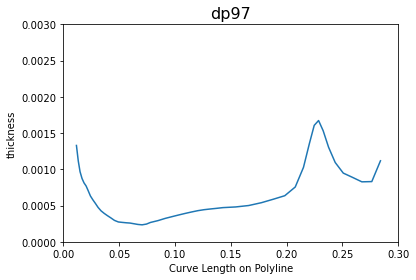

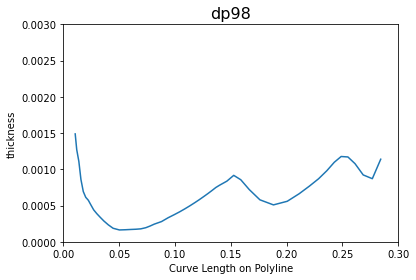

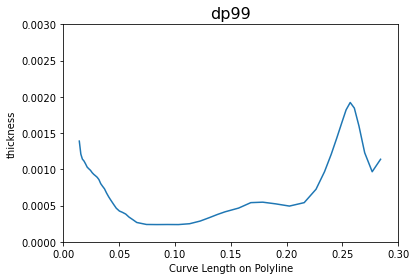

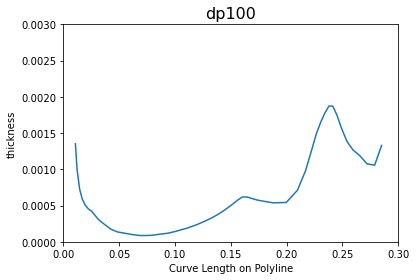

<Figure size 432x288 with 0 Axes>

In [82]:
for i in range (100):
    s = "plt.plot(cut2_thickness_dp%d.iloc[:,0],cut2_thickness_dp%d.iloc[:,1])"%(i+1,i+1)
    exec(s)
    plt.xlabel("Curve Length on Polyline")
    plt.ylabel("thickness")
    plt.xlim(0,0.3)
    plt.ylim(0,0.003)
    plt.title("dp%d"%(i+1),fontsize = 16)
    plt.savefig("C:/Users/SDML/Desktop/blow thickness plot/dp%d_thickness plot.jpg"%(i+1))
    plt.show()
    plt.clf()

    